# Initialization cell

In [601]:
# initialization cell
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math
import time
import os
import scipy 
current_path = os.getcwd()
path_to_files = current_path + '/../sz_auxiliary_files/'
path_to_kSZ2X_2022 = '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts/kSZ2X_2022/'
import matplotlib.patches as mpatches

font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

arcmin_to_radians = np.pi/(60.*180.)

# the parameters needed for the ksz calculations:
ksz_params = {
#fiducial ksz params

'k_min_for_pk_class_sz' : 0.001,
'k_max_for_pk_class_sz' : 60.0,
'k_per_decade_class_sz' : 50,
'P_k_max_h/Mpc' : 100.0,
# 'non linear' : 'halofit',


# 'sz_verbose' : 0, # for full output when not using python wrapper set to >100, this doesnt work with python wrapper

'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.001,


'ndim_masses' : 80,
'ndim_redshifts' : 80,




'n_ell_density_profile' : 50,
'n_m_density_profile' : 50,
'n_z_density_profile' : 50,
'k_per_decade_for_pk' : 50,
'z_max_pk' : 4.0,
    

# slow:
# 'n_z_psi_b1g' : 100,
# 'n_l_psi_b1g' : 400,

# 'n_z_psi_b2g' : 100,
# 'n_l_psi_b2g' : 400,

# 'n_z_psi_b2t' : 100,
# 'n_l_psi_b2t' : 400,

# 'n_z_psi_b1t' : 100,
# 'n_l_psi_b1t' : 100,

# 'n_z_psi_b1gt' : 100,
# 'n_l_psi_b1gt' : 100,
    
    
# fast:
'n_z_psi_b1g' : 50,
'n_l_psi_b1g' : 50,

'n_z_psi_b2g' : 50,
'n_l_psi_b2g' : 50,

'n_z_psi_b2t' : 50,
'n_l_psi_b2t' : 50,

'n_z_psi_b1t' : 50,
'n_l_psi_b1t' : 50,

'n_z_psi_b1gt' : 50,
'n_l_psi_b1gt' : 50,

'N_samp_fftw' : 800, # fast: 800 ;  slow: 2000
'l_min_samp_fftw' : 1e-9,
'l_max_samp_fftw' : 1e9,
    
'N_kSZ2_gal_multipole_grid' :  70,
'N_kSZ2_gal_theta_grid' :  70,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,
}

# the parameters needed for cosmology:

cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'h': 0.6766,
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

'k_pivot': 0.05,
'N_ncdm': 1,
'N_ur': 2.0328,
'm_ncdm': 0.06    

}

# the common parameters:

common_params = {

'z_min' : 0.005,
'z_max' : 3.0,
'M_min' : 1.0e10, 
'M_max' : 3.5e15,
    

'delta for galaxies' : "200c",
'delta for matter density' : "200c",
'mass function' : 'T08M200c',
'concentration parameter' : 'B13',

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.0005,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.0005,


'ell_max': 1600.0,
'ell_min': 2.0,
'dell': 10,

'non linear' : 'halofit',
'pk_nonlinear_for_vrms2' : 1,
'hm_consistency' : 1,
    
'f_free' : 1.0,
    

# 'ndim_masses': 150,
# 'ndim_redshifts': 150,

# 'P_k_max_h/Mpc': 50.0,
# 'k_min_for_pk_class_sz': 0.0001,
# 'k_max_for_pk_class_sz': 10.0,
# 'k_per_decade_class_sz': 20.0,
    
'x_out_truncated_nfw_profile':1.,
'x_out_truncated_density_profile (electrons)': 1., 
'use_xout_in_density_profile_from_enclosed_mass': 1,
'normalize_gas_density_profile': 0,
    
'ksz template file': path_to_kSZ2X_2022+'external_data/dl_ksz_hm_agn_1p2h_uK2_170422.txt',
'ksz template file, reio contribution': path_to_kSZ2X_2022+'external_data/dl_ksz_hm_agn_1p2h_uK2_170422_zeros.txt',
     
}


# HOD params for kSZ2-g

bestfit_blue_hod_params = {
'galaxy_sample': 'unwise',
'galaxy_sample_id': "blue",
'UNWISE_dndz_file' : "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_dndz_cosmos.txt",
# 'UNWISE_fdndz_file' : "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_fdndz.txt",

   

'sigma_log10M_HOD' : 0.69,
'alpha_s_HOD' :  1.30,
'M1_prime_HOD' : 5.03e12, # Msun/h
'M_min_HOD' : 6.25e11, # Msun/h
'cl_gal_gal_A_sn' : -0.26e-7, 
'x_out_truncated_nfw_profile_satellite_galaxies' : 1.09,


'M0_HOD':0,  # Msun/h
'M0 equal M_min (HOD)': 'no',
   
    
}

bestfit_green_hod_params = {
'galaxy_sample': 'unwise',
'galaxy_sample_id': "green",
'UNWISE_dndz_file' : "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_dndz_cosmos.txt",
   

'sigma_log10M_HOD' : 0.97,
'alpha_s_HOD' :  1.30,
'M1_prime_HOD' : 2.76e13, # Msun/h
'M_min_HOD' : 1.34e13, # Msun/h
'cl_gal_gal_A_sn' : 1.38e-7, 
'x_out_truncated_nfw_profile_satellite_galaxies' : 2.75,


'M0_HOD':0,  # Msun/h
'M0 equal M_min (HOD)': 'no',
 
    
}


T_cmb = 2.7255
l_max_planck = 3000
l_max_advact_s4_so = 8000



# Templates for computation of filters

In [602]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set({
'dell':0.,
'dlogell':0.2,
'ell_max' : 12000,
'ell_min' : 2,
})

M.set({

'output':'kSZ_kSZ_1h,kSZ_kSZ_2h',
'gas profile':'nfw',
})

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

cl_ksz_nfw = M.cl_ksz()




M.set({

'output':'tCl,lCl,kSZ_kSZ_1h,kSZ_kSZ_2h',
'modes':'s',
'lensing': 'yes',
'l_max_scalars':12000,

'gas profile':'B16',
'gas profile mode' : 'agn',

})
        
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

cl_ksz_b16_agn = M.cl_ksz()
lensed_cl = M.lensed_cl()

computed in 5.9765 seconds
computed in 21.0126 seconds


In [603]:
print(M.get_f_b())

0.15745030410017352


## save the templates

In [62]:
x = cl_ksz_b16_agn['ell']
y = (np.asarray(cl_ksz_b16_agn['1h'])+np.asarray(cl_ksz_b16_agn['2h']))

y_1h = (np.asarray(cl_ksz_b16_agn['1h']))
y_2h = (np.asarray(cl_ksz_b16_agn['2h']))

dl_ksz_hm = y*(M.T_cmb()*1e6)**2.
dl_ksz_hm_1h = y_1h*(M.T_cmb()*1e6)**2.
dl_ksz_hm_2h = y_2h*(M.T_cmb()*1e6)**2.

l_ksz_hm  = x
dl_ksz_hm_interp = scipy.interpolate.interp1d(l_ksz_hm,dl_ksz_hm)
dl_ksz_hm_1h_interp = scipy.interpolate.interp1d(l_ksz_hm,dl_ksz_hm_1h)
dl_ksz_hm_2h_interp = scipy.interpolate.interp1d(l_ksz_hm,dl_ksz_hm_2h)

newl = np.arange(2,10000)


np.savetxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422.txt',np.c_[newl,dl_ksz_hm_interp(newl)])
np.savetxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422_zeros.txt',np.c_[newl,0.*dl_ksz_hm_interp(newl)])
np.savetxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1h_uK2_170422.txt',np.c_[newl,dl_ksz_hm_1h_interp(newl)])
np.savetxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_2h_uK2_170422.txt',np.c_[newl,dl_ksz_hm_2h_interp(newl)])

x = cl_ksz_nfw['ell']
y = (np.asarray(cl_ksz_nfw['1h'])+np.asarray(cl_ksz_nfw['2h']))

y_1h = (np.asarray(cl_ksz_nfw['1h']))
y_2h = (np.asarray(cl_ksz_nfw['2h']))

dl_ksz_hm_nfw = y*(M.T_cmb()*1e6)**2.
dl_ksz_hm_nfw_1h = y_1h*(M.T_cmb()*1e6)**2.
dl_ksz_hm_nfw_2h = y_2h*(M.T_cmb()*1e6)**2.

l_ksz_hm_nfw  = x
dl_ksz_hm_nfw_interp = scipy.interpolate.interp1d(l_ksz_hm_nfw,dl_ksz_hm_nfw)
dl_ksz_hm_nfw_1h_interp = scipy.interpolate.interp1d(l_ksz_hm_nfw,dl_ksz_hm_nfw_1h)
dl_ksz_hm_nfw_2h_interp = scipy.interpolate.interp1d(l_ksz_hm_nfw,dl_ksz_hm_nfw_2h)

np.savetxt(path_to_kSZ2X_2022+'dl_ksz_hm_nfw_1p2h_uK2_170422.txt',np.c_[newl,dl_ksz_hm_nfw_interp(newl)])
np.savetxt(path_to_kSZ2X_2022+'dl_ksz_hm_nfw_1h_uK2_170422.txt',np.c_[newl,dl_ksz_hm_nfw_1h_interp(newl)])
np.savetxt(path_to_kSZ2X_2022+'dl_ksz_hm_nfw_2h_uK2_170422.txt',np.c_[newl,dl_ksz_hm_nfw_2h_interp(newl)])



ls = M.raw_cl()['ell']
dls = M.raw_cl()['ell']*(M.raw_cl()['ell']+1.)/2./np.pi*M.raw_cl()['tt']
dls_interp = scipy.interpolate.interp1d(ls,dls)
np.savetxt(path_to_kSZ2X_2022+'dl_TT_unlensed_dimensionless_170422.txt',np.c_[newl,dls_interp(newl)])

ls = M.lensed_cl()['ell']
dls = M.lensed_cl()['ell']*(M.lensed_cl()['ell']+1.)/2./np.pi*M.lensed_cl()['tt']
dls_interp = scipy.interpolate.interp1d(ls,dls)
np.savetxt(path_to_kSZ2X_2022+'dl_TT_lensed_dimensionless_170422.txt',np.c_[newl,dls_interp(newl)])


l_arr = newl
DeltaT = 47.*arcmin_to_radians
ThetaFWHM = 5.*arcmin_to_radians
Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))

np.savetxt(path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',np.c_[l_arr,Nl])

l_arr = newl
DeltaT = 20.*arcmin_to_radians
ThetaFWHM = 1.4*arcmin_to_radians
Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))

np.savetxt(path_to_kSZ2X_2022+'nl_advact_20uK_1p4arcmin_uK2_170422.txt',np.c_[l_arr,Nl])

l_arr = newl
DeltaT = 10.*arcmin_to_radians
ThetaFWHM = 1.4*arcmin_to_radians
Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))

np.savetxt(path_to_kSZ2X_2022+'nl_advact_10uK_1p4arcmin_uK2_170422.txt',np.c_[l_arr,Nl])



l_arr = newl
DeltaT = 10.*arcmin_to_radians
ThetaFWHM = 1.5*arcmin_to_radians
Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))

np.savetxt(path_to_kSZ2X_2022+'nl_advact_10uK_1p5arcmin_uK2_170422.txt',np.c_[l_arr,Nl])




nl_so_goal_l, nl_so_goal_nl_std_ilc, nl_so_goal_nl_cilc_tsz, nl_so_goal_nl_cilc_cib, nl_so_goal_nl_cilc_tszcib = np.loadtxt(path_to_kSZ2X_2022+'external_data/SO_LAT_Nell_T_atmv1_goal_fsky0p4_ILC_CMB.txt',unpack=True)
ls4,nls4,ys4 = np.loadtxt(path_to_kSZ2X_2022+'external_data/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',unpack=True)



np.savetxt(path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',
           np.c_[nl_so_goal_l,nl_so_goal_nl_std_ilc])
np.savetxt(path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',
           np.c_[ls4,nls4])




## plot the templates cl ksz

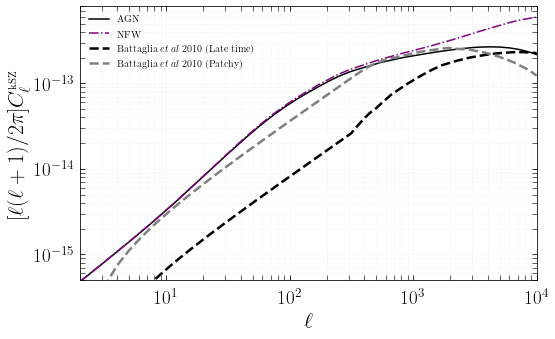

In [63]:
label_size = 19
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(8,5))


ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')

ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$[\ell(\ell+1)/2\pi] C_\ell^{_\mathrm{kSZ}}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)


x,y = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422.txt',unpack=True)
ax.plot(x,y*(T_cmb*1e6)**-2.,c='k',label=r'$\mathrm{AGN}$')


x,y = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_nfw_1p2h_uK2_170422.txt',unpack=True)
ax.plot(x,y*(T_cmb*1e6)**-2.,c='purple',ls='-.',label=r'$\mathrm{NFW}$')


l_bat,dl_bat = np.loadtxt(path_to_files+'/cl_ksz_bat.dat',unpack=True)
ax.plot(l_bat,dl_bat*(T_cmb*1e6)**-2.,label=r'$\mathrm{Battaglia}$ $et$ $al$ $2010$ $(\mathrm{Late}$ $\mathrm{time})$',ls='--',c='k',lw=2.5)

l_bat_patchy,dl_bat_patchy = np.loadtxt(path_to_files+'/FBN_kSZ_PS_patchy.d.txt',unpack=True)
ax.plot(l_bat_patchy,dl_bat_patchy*(T_cmb*1e6)**-2.,label=r'$\mathrm{Battaglia}$ $et$ $al$ $2010$ $(\mathrm{Patchy})$',ls='--',c='grey',lw=2.5)


# ax.plot(l_bat_patchy,(dl_bat_patchy+dl_bat)*(M.T_cmb()*1e6)**-2.,label=r'$\mathrm{Battaglia}$ $et$ $al$ $2010$ - Patchy',ls='--',c='grey',lw=2.5)




ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(fontsize=10,frameon=False)
ax.set_ylim(5e-16,8e-13)
ax.set_xlim(2,1e4)


    
ax.legend(frameon=False,fontsize=10,loc=2)

fig.tight_layout()
# plt.savefig(path_to_kSZ2X_2022+'cls_kSZ.pdf')

## plot the templates cl's and nl's

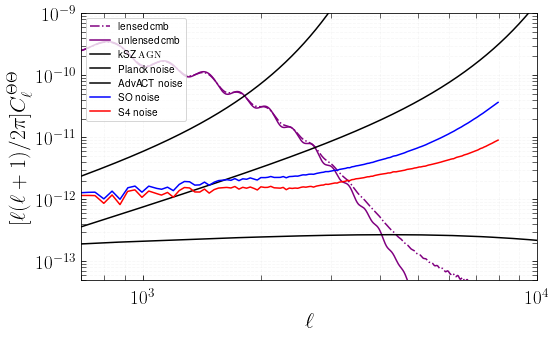

In [5]:
label_size = 19
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(8,5))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$[\ell(\ell+1)/2\pi] C_\ell^{\Theta\Theta}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)



x,y = np.loadtxt(path_to_kSZ2X_2022+'dl_TT_lensed_dimensionless_170422.txt',unpack=True)
ax.plot(x,y,c='purple',ls='-.',label=r'lensed cmb')

x,y = np.loadtxt(path_to_kSZ2X_2022+'dl_TT_unlensed_dimensionless_170422.txt',unpack=True)
ax.plot(x,y,c='purple',ls='-',label=r'unlensed cmb')


x,y = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422.txt',unpack=True)
ax.plot(x,y*(T_cmb*1e6)**-2.,c='k',label=r'kSZ $\mathrm{AGN}$')


x,y = np.loadtxt(path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',unpack=True)
ax.plot(x,x*(x+1.)/2./np.pi*y*(T_cmb*1e6)**-2.,c='k',label=r'Planck noise')


x,y = np.loadtxt(path_to_kSZ2X_2022+'nl_advact_20uK_1p4arcmin_uK2_170422.txt',unpack=True)
ax.plot(x,x*(x+1.)/2./np.pi*y*(T_cmb*1e6)**-2.,c='k',label=r'AdvACT noise')

x,y = np.loadtxt(path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',unpack=True)
ax.plot(x,x*(x+1.)/2./np.pi*y*(T_cmb*1e6)**-2.,c='b',label=r'SO noise')

x,y = np.loadtxt(path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',unpack=True)
ax.plot(x,x*(x+1.)/2./np.pi*y*(T_cmb*1e6)**-2.,c='r',label=r'S4 noise')



ax.set_yscale('log')
ax.set_xscale('log')
# ax.legend(fontsize=12)
ax.set_ylim(5e-14,1e-9)
ax.set_xlim(7e2,1e4)
fig.tight_layout()
plt.legend(fontsize=10)

## Planck filter "b*F" define and save

In [41]:
l_tt,dl_tt = np.loadtxt(path_to_kSZ2X_2022+'dl_TT_lensed_dimensionless_170422.txt',unpack=True)
tt_interp =  scipy.interpolate.interp1d(l_tt,dl_tt,bounds_error=False,fill_value=1e100)


l_ksz,dl_ksz = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422.txt',unpack=True)
dl_ksz = dl_ksz*(T_cmb*1e6)**-2.
ksz_interp = scipy.interpolate.interp1d(l_ksz,dl_ksz,bounds_error=False,fill_value=0.)                                        

l_nl,dl_nl = np.loadtxt(path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',unpack=True)
dl_nl = l_nl*(l_nl+1.)/2./np.pi*dl_nl*(T_cmb*1e6)**-2.
nl_interp = scipy.interpolate.interp1d(l_nl,dl_nl,bounds_error=False,fill_value=1e100)


l_filter = np.arange(2,10000)
ThetaFWHM = 5.*arcmin_to_radians
bl2 = np.exp(-ThetaFWHM**2.*l_filter*(l_filter+1.)/8./np.log(2.))

dl_ksz = ksz_interp(l_filter)*bl2
dl_tot = ksz_interp(l_filter)*bl2+nl_interp(l_filter)*bl2+tt_interp(l_filter)*bl2

l_fac = l_filter*(l_filter+1.)/2./np.pi

cl_ksz_b2 = dl_ksz/l_fac
cl_tot_b2 = dl_tot/l_fac

Fl_A = np.sqrt(cl_ksz_b2)/cl_tot_b2
Fl_B = cl_ksz_b2/cl_tot_b2
Fl_C = Fl_B/bl2


Fl_A = Fl_A/np.max(Fl_A)*0.5*(1.-np.tanh((l_filter-l_max_planck)/50.))
Fl_B = Fl_B/np.max(Fl_B)*0.5*(1.-np.tanh((l_filter-l_max_planck)/50.))
Fl_C = Fl_C/np.max(Fl_C)*0.5*(1.-np.tanh((l_filter-l_max_planck)/50.))

np.savetxt(path_to_kSZ2X_2022+'planck_fl_A_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_A])
np.savetxt(path_to_kSZ2X_2022+'planck_fl_B_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_B])
np.savetxt(path_to_kSZ2X_2022+'planck_fl_C_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_C])

## Planck filter "b*F" plot

Text(0.5, 1.0, 'Planck')

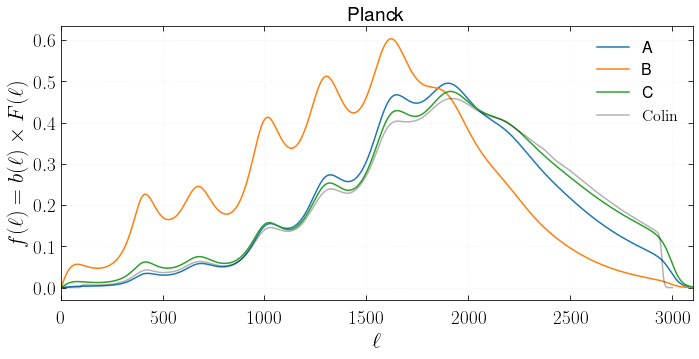

In [42]:
label_size = 19
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(10,5))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')


x,y = np.loadtxt(path_to_kSZ2X_2022+'planck_fl_A_170422.txt',unpack=True)
ax.plot(x,y,label='A')
x,y = np.loadtxt(path_to_kSZ2X_2022+'planck_fl_B_170422.txt',unpack=True)
ax.plot(x,y,label='B')
x,y = np.loadtxt(path_to_kSZ2X_2022+'planck_fl_C_170422.txt',unpack=True)
ax.plot(x,y,label='C')

l_planck, F_planck = np.loadtxt(path_to_kSZ2X_2022+'external_data/planck_filter_jch_2016.txt',unpack=True)
plt.plot(l_planck,F_planck,label=r'$\mathrm{Colin}$',ls='-',c='k',alpha=0.3)

plt.legend(frameon=False)
ax.set_ylabel(r'$f(\ell)= b(\ell)\times F(\ell)$',size=title_size)
ax.set_xlabel(r'$\ell$',size=title_size)
fig.tight_layout()
plt.xlim(0,3100)
plt.title('Planck')

## AdvACT filter "b*F" define and save

In [43]:
l_tt,dl_tt = np.loadtxt(path_to_kSZ2X_2022+'dl_TT_lensed_dimensionless_170422.txt',unpack=True)
tt_interp =  scipy.interpolate.interp1d(l_tt,dl_tt,bounds_error=False,fill_value=1e100)


l_ksz,dl_ksz = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422.txt',unpack=True)
dl_ksz = dl_ksz*(T_cmb*1e6)**-2.
ksz_interp = scipy.interpolate.interp1d(l_ksz,dl_ksz,bounds_error=False,fill_value=0.)                                        

l_nl,dl_nl = np.loadtxt(path_to_kSZ2X_2022+'nl_advact_10uK_1p4arcmin_uK2_170422.txt',unpack=True)
dl_nl = l_nl*(l_nl+1.)/2./np.pi*dl_nl*(T_cmb*1e6)**-2.
nl_interp = scipy.interpolate.interp1d(l_nl,dl_nl,bounds_error=False,fill_value=1e100)


l_filter = np.arange(2,10000)
ThetaFWHM = 1.4*arcmin_to_radians
bl2 = np.exp(-ThetaFWHM**2.*l_filter*(l_filter+1.)/8./np.log(2.))

dl_ksz = ksz_interp(l_filter)*bl2
dl_tot = ksz_interp(l_filter)*bl2+nl_interp(l_filter)*bl2+tt_interp(l_filter)*bl2

l_fac = l_filter*(l_filter+1.)/2./np.pi

cl_ksz_b2 = dl_ksz/l_fac
cl_tot_b2 = dl_tot/l_fac

Fl_A = np.sqrt(cl_ksz_b2)/cl_tot_b2
Fl_B = cl_ksz_b2/cl_tot_b2
Fl_C = Fl_B/bl2


Fl_A = Fl_A/np.max(Fl_A)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
Fl_B = Fl_B/np.max(Fl_B)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
Fl_C = Fl_C/np.max(Fl_C)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))

np.savetxt(path_to_kSZ2X_2022+'advact_10uK_1p4arcmin_fl_C_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_C])

In [45]:
l_tt,dl_tt = np.loadtxt(path_to_kSZ2X_2022+'dl_TT_lensed_dimensionless_170422.txt',unpack=True)
tt_interp =  scipy.interpolate.interp1d(l_tt,dl_tt,bounds_error=False,fill_value=1e100)


l_ksz,dl_ksz = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422.txt',unpack=True)
dl_ksz = dl_ksz*(T_cmb*1e6)**-2.
ksz_interp = scipy.interpolate.interp1d(l_ksz,dl_ksz,bounds_error=False,fill_value=0.)                                        

l_nl,dl_nl = np.loadtxt(path_to_kSZ2X_2022+'nl_advact_10uK_1p5arcmin_uK2_170422.txt',unpack=True)
dl_nl = l_nl*(l_nl+1.)/2./np.pi*dl_nl*(T_cmb*1e6)**-2.
nl_interp = scipy.interpolate.interp1d(l_nl,dl_nl,bounds_error=False,fill_value=1e100)


l_filter = np.arange(2,10000)
ThetaFWHM = 1.5*arcmin_to_radians
bl2 = np.exp(-ThetaFWHM**2.*l_filter*(l_filter+1.)/8./np.log(2.))

dl_ksz = ksz_interp(l_filter)*bl2
dl_tot = ksz_interp(l_filter)*bl2+nl_interp(l_filter)*bl2+tt_interp(l_filter)*bl2

l_fac = l_filter*(l_filter+1.)/2./np.pi

cl_ksz_b2 = dl_ksz/l_fac
cl_tot_b2 = dl_tot/l_fac

Fl_A = np.sqrt(cl_ksz_b2)/cl_tot_b2
Fl_B = cl_ksz_b2/cl_tot_b2
Fl_C = Fl_B/bl2


Fl_A = Fl_A/np.max(Fl_A)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
Fl_B = Fl_B/np.max(Fl_B)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
Fl_C = Fl_C/np.max(Fl_C)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))

np.savetxt(path_to_kSZ2X_2022+'advact_10uK_1p5arcmin_fl_C_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_C])

In [46]:
l_tt,dl_tt = np.loadtxt(path_to_kSZ2X_2022+'dl_TT_lensed_dimensionless_170422.txt',unpack=True)
tt_interp =  scipy.interpolate.interp1d(l_tt,dl_tt,bounds_error=False,fill_value=1e100)


l_ksz,dl_ksz = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422.txt',unpack=True)
dl_ksz = dl_ksz*(T_cmb*1e6)**-2.
ksz_interp = scipy.interpolate.interp1d(l_ksz,dl_ksz,bounds_error=False,fill_value=0.)                                        

l_nl,dl_nl = np.loadtxt(path_to_kSZ2X_2022+'nl_advact_20uK_1p4arcmin_uK2_170422.txt',unpack=True)
dl_nl = l_nl*(l_nl+1.)/2./np.pi*dl_nl*(T_cmb*1e6)**-2.
nl_interp = scipy.interpolate.interp1d(l_nl,dl_nl,bounds_error=False,fill_value=1e100)


l_filter = np.arange(2,10000)
ThetaFWHM = 1.5*arcmin_to_radians
bl2 = np.exp(-ThetaFWHM**2.*l_filter*(l_filter+1.)/8./np.log(2.))

dl_ksz = ksz_interp(l_filter)*bl2
dl_tot = ksz_interp(l_filter)*bl2+nl_interp(l_filter)*bl2+tt_interp(l_filter)*bl2

l_fac = l_filter*(l_filter+1.)/2./np.pi

cl_ksz_b2 = dl_ksz/l_fac
cl_tot_b2 = dl_tot/l_fac

Fl_A = np.sqrt(cl_ksz_b2)/cl_tot_b2
Fl_B = cl_ksz_b2/cl_tot_b2
Fl_C = Fl_B/bl2


Fl_A = Fl_A/np.max(Fl_A)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
Fl_B = Fl_B/np.max(Fl_B)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
Fl_C = Fl_C/np.max(Fl_C)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))

np.savetxt(path_to_kSZ2X_2022+'advact_20uK_1p4arcmin_fl_A_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_A])
np.savetxt(path_to_kSZ2X_2022+'advact_20uK_1p4arcmin_fl_B_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_B])
np.savetxt(path_to_kSZ2X_2022+'advact_20uK_1p4arcmin_fl_C_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_C])

## AdvACT filter "b*F" plot

Text(0.5, 1.0, 'advACT')

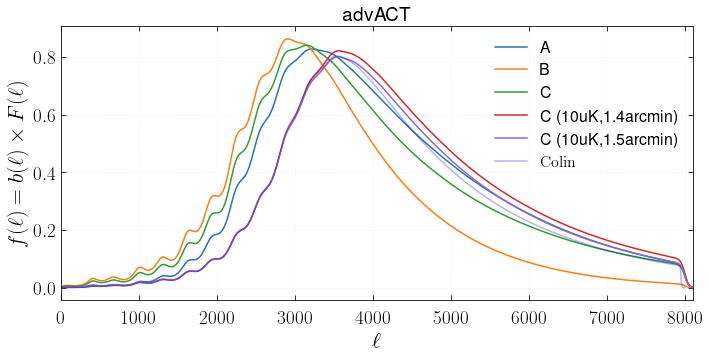

In [47]:
label_size = 19
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(10,5))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')


x,y = np.loadtxt(path_to_kSZ2X_2022+'advact_20uK_1p4arcmin_fl_A_170422.txt',unpack=True)
ax.plot(x,y,label='A')
x,y = np.loadtxt(path_to_kSZ2X_2022+'advact_20uK_1p4arcmin_fl_B_170422.txt',unpack=True)
ax.plot(x,y,label='B')
x,y = np.loadtxt(path_to_kSZ2X_2022+'advact_20uK_1p4arcmin_fl_C_170422.txt',unpack=True)
ax.plot(x,y,label='C')

x,y = np.loadtxt(path_to_kSZ2X_2022+'advact_10uK_1p4arcmin_fl_C_170422.txt',unpack=True)
ax.plot(x,y,label='C (10uK,1.4arcmin)')

x,y = np.loadtxt(path_to_kSZ2X_2022+'advact_10uK_1p5arcmin_fl_C_170422.txt',unpack=True)
ax.plot(x,y,label='C (10uK,1.5arcmin)')


l_planck, F_planck = np.loadtxt(path_to_kSZ2X_2022+'external_data/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',unpack=True)
plt.plot(l_planck,F_planck,label=r'$\mathrm{Colin}$',ls='-',c='b',alpha=0.3)

plt.legend(frameon=False)
ax.set_ylabel(r'$f(\ell)= b(\ell)\times F(\ell)$',size=title_size)
ax.set_xlabel(r'$\ell$',size=title_size)
fig.tight_layout()
plt.xlim(0,8100)
plt.title('advACT')

## SO filter "b*F" define and save

In [48]:
l_tt,dl_tt = np.loadtxt(path_to_kSZ2X_2022+'dl_TT_lensed_dimensionless_170422.txt',unpack=True)
tt_interp =  scipy.interpolate.interp1d(l_tt,dl_tt,bounds_error=False,fill_value=1e100)


l_ksz,dl_ksz = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422.txt',unpack=True)
dl_ksz = dl_ksz*(T_cmb*1e6)**-2.
ksz_interp = scipy.interpolate.interp1d(l_ksz,dl_ksz,bounds_error=False,fill_value=0.)                                        

l_nl,dl_nl = np.loadtxt(path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',unpack=True)
dl_nl = l_nl*(l_nl+1.)/2./np.pi*dl_nl*(T_cmb*1e6)**-2.
nl_interp = scipy.interpolate.interp1d(l_nl,dl_nl,bounds_error=False,fill_value=1e100)


l_filter = np.arange(2,10000)
ThetaFWHM = 1.4*arcmin_to_radians
bl2 = np.exp(-ThetaFWHM**2.*l_filter*(l_filter+1.)/8./np.log(2.))

dl_ksz = ksz_interp(l_filter)*bl2
dl_tot = ksz_interp(l_filter)*bl2+nl_interp(l_filter)*bl2+tt_interp(l_filter)*bl2

l_fac = l_filter*(l_filter+1.)/2./np.pi

cl_ksz_b2 = dl_ksz/l_fac
cl_tot_b2 = dl_tot/l_fac

Fl_A = np.sqrt(cl_ksz_b2)/cl_tot_b2
Fl_B = cl_ksz_b2/cl_tot_b2
Fl_C = Fl_B/bl2


Fl_A = Fl_A/np.max(Fl_A)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
Fl_B = Fl_B/np.max(Fl_B)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
Fl_C = Fl_C/np.max(Fl_C)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))

np.savetxt(path_to_kSZ2X_2022+'so_fl_A_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_A])
np.savetxt(path_to_kSZ2X_2022+'so_fl_B_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_B])
np.savetxt(path_to_kSZ2X_2022+'so_fl_C_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_C])

## SO filter "b*F" plot

Text(0.5, 1.0, 'SO')

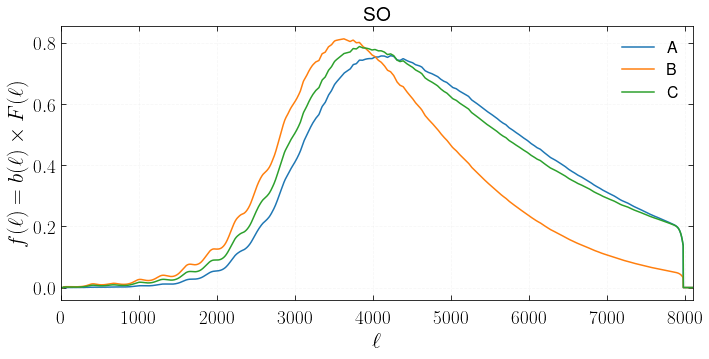

In [49]:
label_size = 19
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(10,5))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')


x,y = np.loadtxt(path_to_kSZ2X_2022+'so_fl_A_170422.txt',unpack=True)
ax.plot(x,y,label='A')
x,y = np.loadtxt(path_to_kSZ2X_2022+'so_fl_B_170422.txt',unpack=True)
ax.plot(x,y,label='B')
x,y = np.loadtxt(path_to_kSZ2X_2022+'so_fl_C_170422.txt',unpack=True)
ax.plot(x,y,label='C')



plt.legend(frameon=False)
ax.set_ylabel(r'$f(\ell)= b(\ell)\times F(\ell)$',size=title_size)
ax.set_xlabel(r'$\ell$',size=title_size)
fig.tight_layout()
plt.xlim(0,8100)
plt.title('SO')

## S4 filter "b*F" define and save

In [50]:
l_tt,dl_tt = np.loadtxt(path_to_kSZ2X_2022+'dl_TT_lensed_dimensionless_170422.txt',unpack=True)
tt_interp =  scipy.interpolate.interp1d(l_tt,dl_tt,bounds_error=False,fill_value=1e100)


l_ksz,dl_ksz = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422.txt',unpack=True)
dl_ksz = dl_ksz*(T_cmb*1e6)**-2.
ksz_interp = scipy.interpolate.interp1d(l_ksz,dl_ksz,bounds_error=False,fill_value=0.)                                        

l_nl,dl_nl = np.loadtxt(path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',unpack=True)
dl_nl = l_nl*(l_nl+1.)/2./np.pi*dl_nl*(T_cmb*1e6)**-2.
nl_interp = scipy.interpolate.interp1d(l_nl,dl_nl,bounds_error=False,fill_value=1e100)


l_filter = np.arange(2,10000)
ThetaFWHM = 1.4*arcmin_to_radians
bl2 = np.exp(-ThetaFWHM**2.*l_filter*(l_filter+1.)/8./np.log(2.))

dl_ksz = ksz_interp(l_filter)*bl2
dl_tot = ksz_interp(l_filter)*bl2+nl_interp(l_filter)*bl2+tt_interp(l_filter)*bl2

l_fac = l_filter*(l_filter+1.)/2./np.pi

cl_ksz_b2 = dl_ksz/l_fac
cl_tot_b2 = dl_tot/l_fac

Fl_A = np.sqrt(cl_ksz_b2)/cl_tot_b2
Fl_B = cl_ksz_b2/cl_tot_b2
Fl_C = Fl_B/bl2


Fl_A = Fl_A/np.max(Fl_A)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
Fl_B = Fl_B/np.max(Fl_B)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
Fl_C = Fl_C/np.max(Fl_C)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))

np.savetxt(path_to_kSZ2X_2022+'s4_fl_A_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_A])
np.savetxt(path_to_kSZ2X_2022+'s4_fl_B_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_B])
np.savetxt(path_to_kSZ2X_2022+'s4_fl_C_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_C])

## S4 filter save

Text(0.5, 1.0, 'S4')

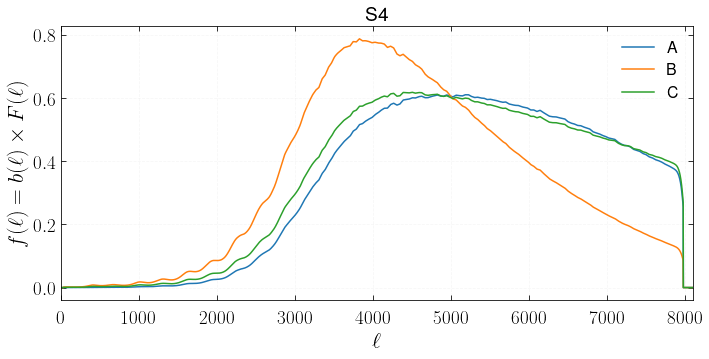

In [51]:
label_size = 19
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(10,5))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')


x,y = np.loadtxt(path_to_kSZ2X_2022+'s4_fl_A_170422.txt',unpack=True)
ax.plot(x,y,label='A')
x,y = np.loadtxt(path_to_kSZ2X_2022+'s4_fl_B_170422.txt',unpack=True)
ax.plot(x,y,label='B')
x,y = np.loadtxt(path_to_kSZ2X_2022+'s4_fl_C_170422.txt',unpack=True)
ax.plot(x,y,label='C')



plt.legend(frameon=False)
ax.set_ylabel(r'$f(\ell)= b(\ell)\times F(\ell)$',size=title_size)
ax.set_xlabel(r'$\ell$',size=title_size)
fig.tight_layout()
plt.xlim(0,8100)
plt.title('S4')

# SNR tot calculations

## Planck x WISE

### Same settings as Ferraro+16

In [65]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'external_data/planck_filter_jch_2016.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 0,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.7, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 80.2820 seconds


#### save data

In [66]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_f16filter_linvel_fsky0p7_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [67]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_f16filter_linvel_fsky0p7_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

2.3885952014753267
4.777190402950653


#### comparison plot with Ferraro16

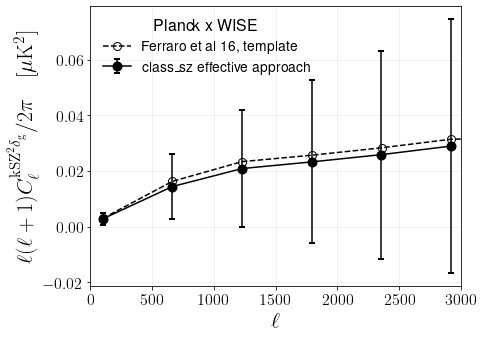

In [68]:
F = np.loadtxt(path_to_kSZ2X_2022+'external_data/ksz2g_wise_ferraroetal16templates.txt')
ls = F[0,:]
cls_planck = F[1,:]
cls_advact = F[2,:]
cls_s4 = F[3,:]




l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_f16filter_linvel_fsky0p7_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',unpack=True)
fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi



label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5),sharey=True)

ax=ax1



ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            marker='o',
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label='class\_sz effective approach',
            c='k')
ax.plot(ls,
        cls_planck,
        label='Ferraro et al 16, template',
        ls='--',
        c='k',
        markerfacecolor='None',
        markersize=8,
        marker='o')

ax.legend(title='Planck x WISE',
          loc=2,
          frameon=False,
          fontsize=14)
ax.set_xlim(0.,3000)

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^{\mathrm{kSZ}^2\delta_\mathrm{g}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

ax.grid(which='both',alpha=0.2)
fig.tight_layout()
# plt.savefig('Planck_WISE.pdf')



### Same settings as Ferraro+16 but fsky=0.6

In [69]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'external_data/planck_filter_jch_2016.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 0,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 79.8023 seconds


#### save data

In [70]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_f16filter_linvel_fsky0p6_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [71]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_f16filter_linvel_fsky0p6_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

2.211409447746125
4.42281889549225


### Same settings as Ferraro+16 but fsky=0.6 and nonlin veldisp

In [72]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'external_data/planck_filter_jch_2016.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 79.5088 seconds


#### save data

In [73]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_f16filter_nonlinvel_fsky0p6_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [74]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_f16filter_nonlinvel_fsky0p6_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

3.092640901562946
6.185281803125892


### fsky=0.6, nonlin veldisp, filter C

In [75]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_C_170422.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 79.1110 seconds


#### save data

In [76]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_filterC_nonlinvel_fsky0p6_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [77]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_filterC_nonlinvel_fsky0p6_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

3.109908195686076
6.219816391372152


### fsky=0.6, nonlin veldisp, filter A

In [78]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_A_170422.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 79.5482 seconds


#### save data

In [79]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_filterA_nonlinvel_fsky0p6_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [80]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_filterA_nonlinvel_fsky0p6_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

3.1863836188474037
6.3727672376948075


### fsky=0.6, nonlin veldisp, filter B

In [81]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_B_170422.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 82.4768 seconds


#### save data

In [82]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_filterB_nonlinvel_fsky0p6_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [83]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_filterB_nonlinvel_fsky0p6_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

1.8672684367365875
3.734536873473175


## Planck x unWISE blue

In [201]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',


        
'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_A_170422.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

# bg, blue: 1.56; green: 2.23
'effective_galaxy_bias': 1.56,

# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
'cl_gal_gal_A_sn' : 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 70.9727 seconds


### save data

In [202]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_uwise_blue_filterA_nonlinvel_fsky0p6_bg1p56_sn8p94e-8_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

### compute SNR

In [203]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_uwise_blue_filterA_nonlinvel_fsky0p6_bg1p56_sn8p94e-8_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

2.1052236306760017
4.210447261352003


## Planck x unWISE green

In [204]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)

M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',


        
'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_A_170422.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

# bg, blue: 1.56; green: 2.23
'effective_galaxy_bias': 2.23,

# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 64.0566 seconds


### save data

In [205]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_uwise_green_filterA_nonlinvel_fsky0p6_bg2p23_sn1p65e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

### compute SNR

In [206]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_uwise_green_filterA_nonlinvel_fsky0p6_bg2p23_sn1p65e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

0.9632218697770065
1.926443739554013


## AdvACT x WISE

### Same settings as Ferraro+16

In [90]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'external_data/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_10uK_1p4arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 0,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.5, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 142.0981 seconds


#### save data

In [91]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_f16filter_linvel_fsky0p5_bg1p13_sn1p25e-7_nl10uK_b1p4arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [132]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_f16filter_linvel_fsky0p5_bg1p13_sn1p25e-7_nl10uK_b1p4arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

111.83367200679265
223.6673440135853


#### comparison plot with Ferraro16

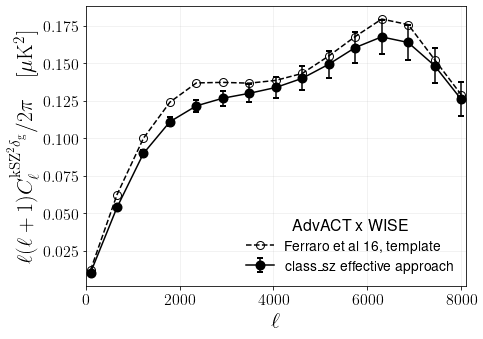

In [95]:
F = np.loadtxt(path_to_kSZ2X_2022+'external_data/ksz2g_wise_ferraroetal16templates.txt')
ls = F[0,:]
cls_planck = F[1,:]
cls_advact = F[2,:]
cls_s4 = F[3,:]




l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_f16filter_linvel_fsky0p5_bg1p13_sn1p25e-7_nl10uK_b1p4arcmin_hf_l_cl_covll_170422.txt',unpack=True)
fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi



label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5),sharey=True)

ax=ax1



ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            marker='o',
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label='class\_sz effective approach',
            c='k')
ax.plot(ls,
        cls_advact,
        label='Ferraro et al 16, template',
        ls='--',
        c='k',
        markerfacecolor='None',
        markersize=8,
        marker='o')

ax.legend(title='AdvACT x WISE',
          loc=4,
          frameon=False,
          fontsize=14)
ax.set_xlim(0.,8100)

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^{\mathrm{kSZ}^2\delta_\mathrm{g}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

ax.grid(which='both',alpha=0.2)
fig.tight_layout()
# plt.savefig('advact_WISE.pdf')



### Same settings as Ferraro+16 but fsky=0.3

In [96]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'external_data/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_10uK_1p4arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 0,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 142.5294 seconds


#### save data

In [97]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_f16filter_linvel_fsky0p3_bg1p13_sn1p25e-7_nl10uK_b1p4arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [133]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_f16filter_linvel_fsky0p3_bg1p13_sn1p25e-7_nl10uK_b1p4arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

86.6259898455061
173.2519796910122


### Same settings as Ferraro+16 but fsky=0.3 and nonlin veldisp

In [99]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'external_data/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_10uK_1p4arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 143.3126 seconds


#### save data

In [100]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_f16filter_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl10uK_b1p4arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [135]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_f16filter_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl10uK_b1p4arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

119.0960677417261
238.1921354834522


### fsky=0.3, nonlin veldisp, 10uK noise level, filter C (10uK, 1p5arcmin)

In [102]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'advact_10uK_1p5arcmin_fl_C_170422.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_10uK_1p4arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 142.9698 seconds


#### save data

In [103]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_filterC10uk1p5am_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl10uK_b1p4arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [136]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_filterC10uk1p5am_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl10uK_b1p4arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

120.75400039750195
241.5080007950039


### fsky=0.3, nonlin veldisp, 10uK noise level, filter C (10uK, 1p4arcmin)

In [108]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'advact_10uK_1p4arcmin_fl_C_170422.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_10uK_1p4arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 143.7350 seconds


#### save data

In [109]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_filterC10uk1p4am_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl10uK_b1p4arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [137]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_filterC10uk1p4am_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl10uK_b1p4arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

122.06581296082565
244.1316259216513


### fsky=0.3, nonlin veldisp, 20uK noise level, filter C (10uK, 1p4arcmin)

In [111]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'advact_10uK_1p4arcmin_fl_C_170422.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p4arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 144.0618 seconds


#### save data

In [112]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_filterC10uk1p4am_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl20uK_b1p4arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [138]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_filterC10uk1p4am_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl20uK_b1p4arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

41.61950232069389
83.23900464138778


### fsky=0.3, nonlin veldisp, 20uK noise level, filter C (20uK, 1p4arcmin)

In [114]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p4arcmin_fl_C_170422.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p4arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 144.5238 seconds


#### save data

In [115]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_filterC20uk1p4am_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl20uK_b1p4arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [139]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_filterC20uk1p4am_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl20uK_b1p4arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

42.20146794163761
84.40293588327522


### fsky=0.3, nonlin veldisp, 20uK noise level, filter B (20uK, 1p4arcmin)

In [117]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p4arcmin_fl_B_170422.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p4arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 146.6789 seconds


#### save data

In [118]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_filterB20uk1p4am_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl20uK_b1p4arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [140]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_filterB20uk1p4am_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl20uK_b1p4arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

35.66847203446597
71.33694406893194


### fsky=0.3, nonlin veldisp, 20uK noise level, filter A (20uK, 1p4arcmin)

In [120]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p4arcmin_fl_A_170422.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p4arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 145.1651 seconds


#### save data

In [121]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_filterA20uk1p4am_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl20uK_b1p4arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [141]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_filterA20uk1p4am_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl20uK_b1p4arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

44.26519851355892
88.53039702711784


## AdvACT x unWISE blue

In [208]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',


        

'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p4arcmin_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p4arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

# bg, blue: 1.56; green: 2.23
'effective_galaxy_bias': 1.56,

# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
'cl_gal_gal_A_sn' : 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 107.6143 seconds


### save data

In [209]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_uwise_blue_filterA_nonlinvel_fsky0p3_bg1p56_sn8p93e-8_nl20uK_b1p4arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

### compute SNR

In [210]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_uwise_blue_filterA_nonlinvel_fsky0p3_bg1p56_sn8p93e-8_nl20uK_b1p4arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

36.851068362800454
73.70213672560091


## AdvACT x unWISE green

In [211]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)

M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',


        

'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p4arcmin_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p4arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

# bg, blue: 1.56; green: 2.23
'effective_galaxy_bias': 2.23,

# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 96.1974 seconds


### save data

In [212]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_uwise_green_filterA_nonlinvel_fsky0p3_bg2p23_sn1p65e-7_nl20uK_b1p4arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

### compute SNR

In [213]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_uwise_green_filterA_nonlinvel_fsky0p3_bg2p23_sn1p65e-7_nl20uK_b1p4arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

16.048825149066715
32.09765029813343


## SO x unWISE blue

In [214]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',


        

'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

# bg, blue: 1.56; green: 2.23
'effective_galaxy_bias': 1.56,

# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
'cl_gal_gal_A_sn' : 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 106.6284 seconds


### save data

In [215]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_so_x_uwise_blue_filterA_nonlinvel_fsky0p4_bg1p56_sn8p93e-8_nlilc_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

### compute SNR

In [216]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_so_x_uwise_blue_filterA_nonlinvel_fsky0p4_bg1p56_sn8p93e-8_nlilc_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

150.81325070145743
301.62650140291487


## SO x unWISE green

In [217]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)

M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',


        

'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

# bg, blue: 1.56; green: 2.23
'effective_galaxy_bias': 2.23,

# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 93.2619 seconds


### save data

In [218]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_so_x_uwise_green_filterA_nonlinvel_fsky0p4_bg2p23_sn1p65e-7_nlilc_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

### compute SNR

In [219]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_so_x_uwise_green_filterA_nonlinvel_fsky0p4_bg2p23_sn1p65e-7_nlilc_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

68.42632887074167
136.85265774148334


## S4 x unWISE blue

In [220]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',


        

'ksz_filter_file' : path_to_kSZ2X_2022+'s4_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

# bg, blue: 1.56; green: 2.23
'effective_galaxy_bias': 1.56,

# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
'cl_gal_gal_A_sn' : 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 105.6371 seconds


### save data

In [221]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_s4_x_uwise_blue_filterA_nonlinvel_fsky0p4_bg1p56_sn8p93e-8_nlilc_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

### compute SNR

In [222]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_s4_x_uwise_blue_filterA_nonlinvel_fsky0p4_bg1p56_sn8p93e-8_nlilc_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

282.80909894687136
565.6181978937427


## S4 x unWISE green

In [223]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)

M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',


        

'ksz_filter_file' : path_to_kSZ2X_2022+'s4_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

# bg, blue: 1.56; green: 2.23
'effective_galaxy_bias': 2.23,

# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 102.1702 seconds


### save data

In [224]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_s4_x_uwise_green_filterA_nonlinvel_fsky0p4_bg2p23_sn1p65e-7_nlilc_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

### compute SNR

In [225]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_s4_x_uwise_green_filterA_nonlinvel_fsky0p4_bg2p23_sn1p65e-7_nlilc_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

133.1283884051271
266.2567768102542


# SNR on bg and Aksz

## AdvACT x unWISE green (effective approach)

In [226]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_lens_hf,gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p4arcmin_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p4arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 2.23,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 92.8058 seconds


### save data

In [227]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_advact_x_uwise_green_filterA_nonlinvel_fsky0p3_bg2p23_sn1p65e-7_nl20uK_b1p4am_hf_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [228]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_advact_x_uwise_green_filterA_nonlinvel_fsky0p3_bg2p23_sn1p65e-7_nl20uK_b1p4am_hf_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

16.048825149066715
32.09765029813343


### plot to check data

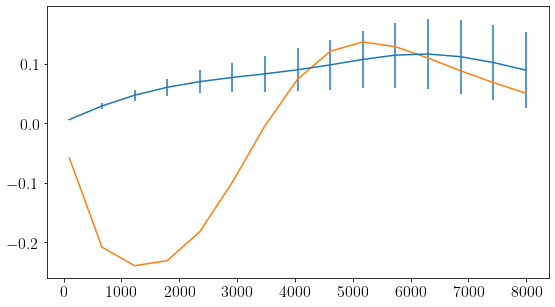

In [229]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
ax.plot(l,fac_l*cl_lensing)

### Fisher matrix forecasts

In [230]:
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)



In [231]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-5
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]
comps_list = [cl_tot,cl_lensing]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_tot + param_fiducial_values[1]*cl_lensing

for i in range(len(param_list)):
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot + delta_p_over_p*param_fiducial_values[i]*cl_lensing 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot - delta_p_over_p*param_fiducial_values[i]*cl_lensing 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_l*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_l*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)


In [232]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)

[0.10262642 0.01672675]


In [233]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

2snr, ie, the snr on ffree 19.48815824335854
the snr on bg 59.784476741288266


### Fisher matrix forecast with prior on bg

In [234]:
prior_list = [
              np.inf, # A_ksz
              0.01578, # bg green: 0.0352/2.23 = 0.01578 | bg blue: 0.0276/1.56 = 0.01769
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)


In [235]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

[0.0837487  0.01147826]
2snr, ie, the snr on ffree 23.88096703825981
the snr on bg 87.12125136350078


## AdvACT x unWISE blue (effective approach)

In [236]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'gal_lens_hf,gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p4arcmin_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p4arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.56, # green: 2.23 | blue: 1.56
'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 102.4644 seconds


### save data

In [237]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_advact_x_uwise_blue_filterA_nonlinvel_fsky0p3_bg1p56_sn8p93e-8_nl20uK_b1p4am_hf_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [238]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_advact_x_uwise_blue_filterA_nonlinvel_fsky0p3_bg1p56_sn8p93e-8_nl20uK_b1p4am_hf_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

36.851068362800454
73.70213672560091


### plot to check data

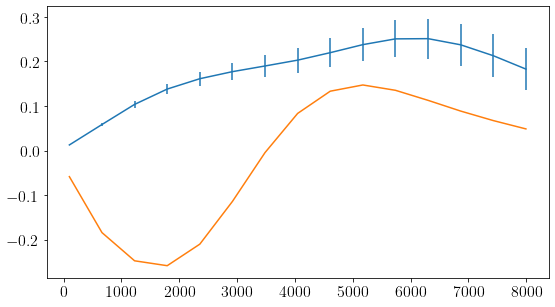

In [239]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
ax.plot(l,fac_l*cl_lensing)

### Fisher matrix forecasts

In [240]:
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)



In [241]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-5
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]
comps_list = [cl_tot,cl_lensing]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_tot + param_fiducial_values[1]*cl_lensing

for i in range(len(param_list)):
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot + delta_p_over_p*param_fiducial_values[i]*cl_lensing 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot - delta_p_over_p*param_fiducial_values[i]*cl_lensing 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_l*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_l*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)


In [242]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)

[0.03176392 0.01477208]


In [243]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

2snr, ie, the snr on ffree 62.96453011141331
the snr on bg 67.69528937926786


### Fisher matrix forecast with prior on bg

In [244]:
prior_list = [
              np.inf, # A_ksz
              0.01769, # bg green: 0.0352/2.23 = 0.01578 | bg blue: 0.0276/1.56 = 0.01769
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)


In [245]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

[0.02994938 0.01133863]
2snr, ie, the snr on ffree 66.77934060574334
the snr on bg 88.19406308466341


## Planck x unWISE green (NFW)

In [250]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 2.23,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'nfw', # set NFW profile
# 'gas profile mode' : 'agn',

      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 28.1022 seconds


### checking effective bias

In [251]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999987642741822
1.9981084085603753


### save data

In [256]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_planck_x_uwise_green_filterA_nonlinvel_fsky0p6_bg2p00_sn1p65e-7_nl47uK_b5am_hmNFW_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [374]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_planck_x_uwise_green_filterA_nonlinvel_fsky0p6_bg2p00_sn1p65e-7_nl47uK_b5am_hmNFW_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

1.604227829177931
3.208455658355862


### plot to check data

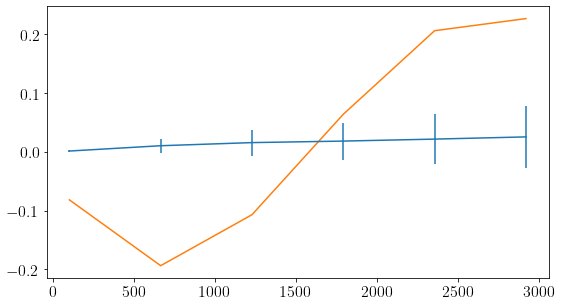

In [258]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
ax.plot(l,fac_l*cl_lensing)

### Fisher matrix forecasts

In [259]:
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)



In [260]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-5
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]
comps_list = [cl_tot,cl_lensing]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_tot + param_fiducial_values[1]*cl_lensing

for i in range(len(param_list)):
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot + delta_p_over_p*param_fiducial_values[i]*cl_lensing 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot - delta_p_over_p*param_fiducial_values[i]*cl_lensing 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_l*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_l*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)


In [261]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)

[0.73959881 0.02490373]


In [262]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

2snr, ie, the snr on ffree 2.704168760576333
the snr on bg 40.1546200892124


### Fisher matrix forecast with prior on bg

In [263]:
prior_list = [
              np.inf, # A_ksz
              0.01578, # bg green: 0.0352/2.23 = 0.01578 | bg blue: 0.0276/1.56 = 0.01769
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)


In [264]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

[0.6587547 0.0133294]
2snr, ie, the snr on ffree 3.0360314511972986
the snr on bg 75.02214536003102


## Planck x unWISE blue (NFW)

In [265]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 


'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'nfw', # set NFW profile
# 'gas profile mode' : 'agn',

      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 26.7860 seconds


### checking effective bias

In [266]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.456603062087112


### save data

In [267]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_planck_x_uwise_blue_filterA_nonlinvel_fsky0p6_bg1p46_sn8p93e-8_nl47uK_b5am_hmNFW_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [375]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_planck_x_uwise_blue_filterA_nonlinvel_fsky0p6_bg1p46_sn8p93e-8_nl47uK_b5am_hmNFW_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

2.884706480371073
5.769412960742146


### plot to check data

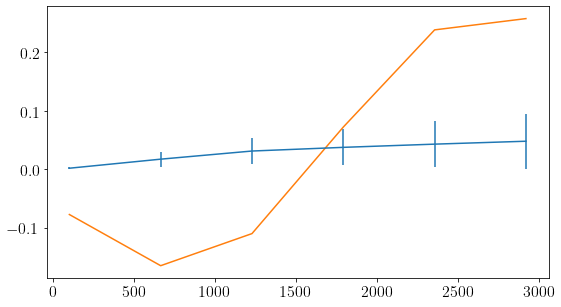

In [269]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
ax.plot(l,fac_l*cl_lensing)

### Fisher matrix forecasts

In [270]:
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)



In [271]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-5
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]
comps_list = [cl_tot,cl_lensing]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_tot + param_fiducial_values[1]*cl_lensing

for i in range(len(param_list)):
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot + delta_p_over_p*param_fiducial_values[i]*cl_lensing 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot - delta_p_over_p*param_fiducial_values[i]*cl_lensing 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_l*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_l*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)


In [272]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)

[0.36262559 0.02675365]


In [273]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

2snr, ie, the snr on ffree 5.515330576078184
the snr on bg 37.378076079810214


### Fisher matrix forecast with prior on bg

In [274]:
prior_list = [
              np.inf, # A_ksz
             0.01769, # bg green: 0.0352/2.23 = 0.01578 | bg blue: 0.0276/1.56 = 0.01769
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)


In [275]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

[0.35159065 0.01475597]
2snr, ie, the snr on ffree 5.688433476028194
the snr on bg 67.76917537248666


## Planck x unWISE green (NFW)

In [250]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 2.23,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'nfw', # set NFW profile
# 'gas profile mode' : 'agn',

      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 28.1022 seconds


### checking effective bias

In [251]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999987642741822
1.9981084085603753


### save data

In [256]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_planck_x_uwise_green_filterA_nonlinvel_fsky0p6_bg2p00_sn1p65e-7_nl47uK_b5am_hmNFW_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [376]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_planck_x_uwise_green_filterA_nonlinvel_fsky0p6_bg2p00_sn1p65e-7_nl47uK_b5am_hmNFW_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

1.604227829177931
3.208455658355862


### plot to check data

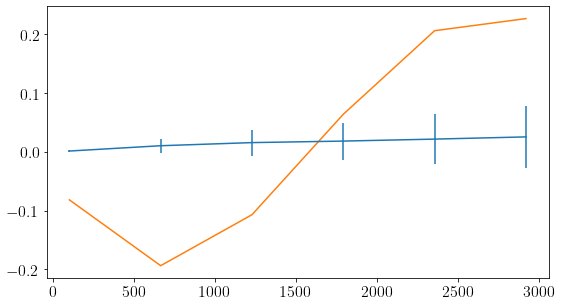

In [258]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
ax.plot(l,fac_l*cl_lensing)

### Fisher matrix forecasts

In [259]:
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)



In [260]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-5
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]
comps_list = [cl_tot,cl_lensing]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_tot + param_fiducial_values[1]*cl_lensing

for i in range(len(param_list)):
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot + delta_p_over_p*param_fiducial_values[i]*cl_lensing 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot - delta_p_over_p*param_fiducial_values[i]*cl_lensing 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_l*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_l*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)


In [261]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)

[0.73959881 0.02490373]


In [262]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

2snr, ie, the snr on ffree 2.704168760576333
the snr on bg 40.1546200892124


### Fisher matrix forecast with prior on bg

In [263]:
prior_list = [
              np.inf, # A_ksz
              0.01578, # bg green: 0.0352/2.23 = 0.01578 | bg blue: 0.0276/1.56 = 0.01769
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)


In [264]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

[0.6587547 0.0133294]
2snr, ie, the snr on ffree 3.0360314511972986
the snr on bg 75.02214536003102


## Planck x unWISE blue (AGN)

In [276]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 


'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'agn',

      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 26.2394 seconds


### checking effective bias

In [277]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.456603062087112


### save data

In [278]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_planck_x_uwise_blue_filterA_nonlinvel_fsky0p6_bg1p46_sn8p93e-8_nl47uK_b5am_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [373]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_planck_x_uwise_blue_filterA_nonlinvel_fsky0p6_bg1p46_sn8p93e-8_nl47uK_b5am_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

1.7401087266984292
3.4802174533968584


### plot to check data

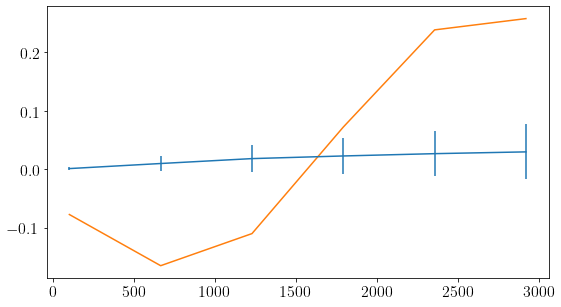

In [280]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
ax.plot(l,fac_l*cl_lensing)

### Fisher matrix forecasts

In [281]:
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)



In [282]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-5
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]
comps_list = [cl_tot,cl_lensing]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_tot + param_fiducial_values[1]*cl_lensing

for i in range(len(param_list)):
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot + delta_p_over_p*param_fiducial_values[i]*cl_lensing 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot - delta_p_over_p*param_fiducial_values[i]*cl_lensing 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_l*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_l*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)


In [283]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)

[0.60967307 0.02690777]


In [284]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

2snr, ie, the snr on ffree 3.2804466825232175
the snr on bg 37.163983374770254


### Fisher matrix forecast with prior on bg

In [285]:
prior_list = [
              np.inf, # A_ksz
             0.01769, # bg green: 0.0352/2.23 = 0.01578 | bg blue: 0.0276/1.56 = 0.01769
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)


In [287]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

[0.5854584  0.01478168]
2snr, ie, the snr on ffree 3.4161265802583967
the snr on bg 67.65132829086929


## Planck x unWISE green (AGN)

In [288]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

# 'effective_galaxy_bias': 2.23,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'agn',

      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 30.4064 seconds


### checking effective bias

In [289]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999987642741822
1.9981084085603753


### save data

In [290]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_planck_x_uwise_green_filterA_nonlinvel_fsky0p6_bg2p00_sn1p65e-7_nl20uK_b1p4am_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [291]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_planck_x_uwise_green_filterA_nonlinvel_fsky0p6_bg2p00_sn1p65e-7_nl20uK_b1p4am_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

1.0010216762827469
2.0020433525654937


### plot to check data

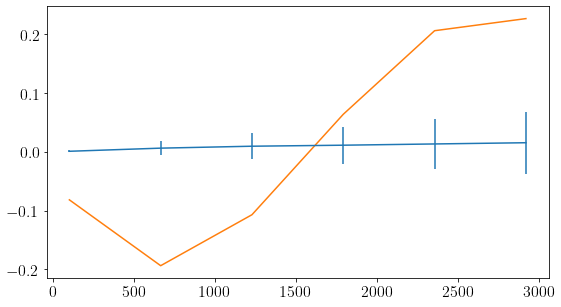

In [292]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
ax.plot(l,fac_l*cl_lensing)

### Fisher matrix forecasts

In [293]:
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)



In [294]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-5
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]
comps_list = [cl_tot,cl_lensing]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_tot + param_fiducial_values[1]*cl_lensing

for i in range(len(param_list)):
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot + delta_p_over_p*param_fiducial_values[i]*cl_lensing 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot - delta_p_over_p*param_fiducial_values[i]*cl_lensing 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_l*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_l*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)


In [295]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)

[1.22639304 0.02560923]


In [296]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

2snr, ie, the snr on ffree 1.6307985585943254
the snr on bg 39.04842586379427


### Fisher matrix forecast with prior on bg

In [297]:
prior_list = [
              np.inf, # A_ksz
              0.01578, # bg green: 0.0352/2.23 = 0.01578 | bg blue: 0.0276/1.56 = 0.01769
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)


In [298]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

[1.06641028 0.01343437]
2snr, ie, the snr on ffree 1.8754507870461488
the snr on bg 74.4359344829692


## AdvACT x unWISE blue (AGN)

In [303]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p4arcmin_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p4arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

# 'effective_galaxy_bias': 2.23,
'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'agn',

      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 36.6703 seconds


### checking effective bias

In [304]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.456603062087112


### save data

In [305]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_advact_x_uwise_blue_filterA_nonlinvel_fsky0p3_bg1p46_sn8p93e-8_nl20uK_b1p4am_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [308]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_advact_x_uwise_blue_filterA_nonlinvel_fsky0p3_bg1p46_sn8p93e-8_nl20uK_b1p4am_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

18.669367316640763
37.338734633281526


### plot to check data

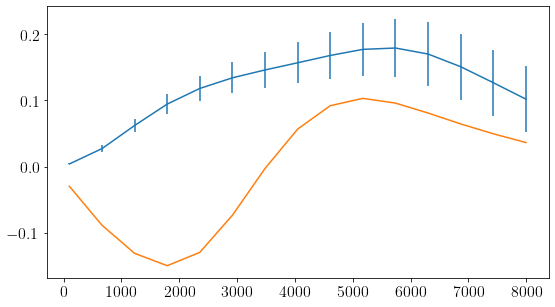

In [309]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
ax.plot(l,fac_l*cl_lensing)

### Fisher matrix forecasts

In [310]:
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)



In [311]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-5
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]
comps_list = [cl_tot,cl_lensing]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_tot + param_fiducial_values[1]*cl_lensing

for i in range(len(param_list)):
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot + delta_p_over_p*param_fiducial_values[i]*cl_lensing 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot - delta_p_over_p*param_fiducial_values[i]*cl_lensing 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_l*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_l*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)


In [312]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)

[0.05393554 0.02516852]


In [313]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

2snr, ie, the snr on ffree 37.081301752263116
the snr on bg 39.73216934313657


### Fisher matrix forecast with prior on bg

In [316]:
prior_list = [
              np.inf, # A_ksz
              0.01769, # bg green: 0.0352/2.23 = 0.01578 | bg blue: 0.0276/1.56 = 0.01769
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)


In [317]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

[0.05368692 0.01447273]
2snr, ie, the snr on ffree 37.2530187484233
the snr on bg 69.0954834989267


## AdvACT x unWISE blue (NFW)

In [318]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p4arcmin_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p4arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

# 'effective_galaxy_bias': 2.23,
'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'nfw', # set NFW profile

      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 38.6260 seconds


### checking effective bias

In [319]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.456603062087112


### save data

In [320]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_advact_x_uwise_blue_filterA_nonlinvel_fsky0p3_bg1p46_sn8p93e-8_nl20uK_b1p4am_hmNFW_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [321]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_advact_x_uwise_blue_filterA_nonlinvel_fsky0p3_bg1p46_sn8p93e-8_nl20uK_b1p4am_hmNFW_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

45.47059948954509
90.94119897909017


### plot to check data

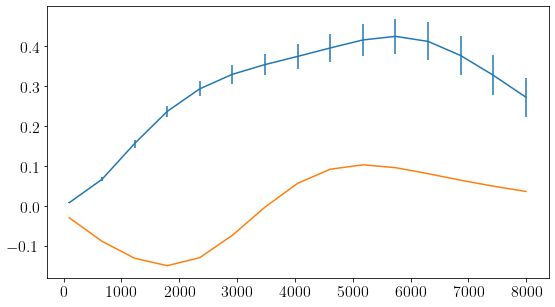

In [322]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
ax.plot(l,fac_l*cl_lensing)

### Fisher matrix forecasts

In [323]:
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)



In [324]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-5
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]
comps_list = [cl_tot,cl_lensing]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_tot + param_fiducial_values[1]*cl_lensing

for i in range(len(param_list)):
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot + delta_p_over_p*param_fiducial_values[i]*cl_lensing 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot - delta_p_over_p*param_fiducial_values[i]*cl_lensing 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_l*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_l*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)


In [325]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)

[0.02533058 0.02489564]


In [326]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

2snr, ie, the snr on ffree 78.95593926617614
the snr on bg 40.167671268492064


### Fisher matrix forecast with prior on bg

In [327]:
prior_list = [
              np.inf, # A_ksz
              0.01769, # bg green: 0.0352/2.23 = 0.01578 | bg blue: 0.0276/1.56 = 0.01769
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)


In [328]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

[0.02316596 0.01442027]
2snr, ie, the snr on ffree 86.33357983654561
the snr on bg 69.34682670730085


## S4 x unWISE blue (AGN)

In [350]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'s4_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',
        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

# 'effective_galaxy_bias': 2.23,
'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16',
'gas profile mode' : 'agn',

      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 40.9678 seconds


### checking effective bias

In [351]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.456603062087112


### save data

In [353]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_s4_x_uwise_blue_filterA_nonlinvel_fsky0p4_bg1p46_sn8p93e-8_nlilc_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [354]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_s4_x_uwise_blue_filterA_nonlinvel_fsky0p4_bg1p46_sn8p93e-8_nlilc_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

102.91370514767485
205.8274102953497


### plot to check data

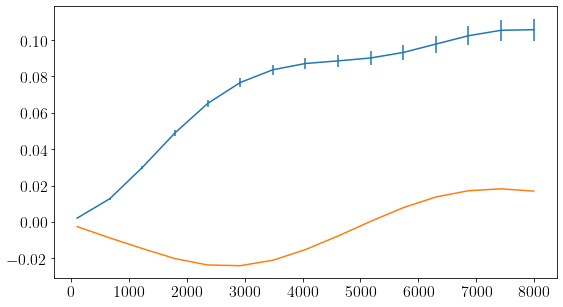

In [355]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
ax.plot(l,fac_l*cl_lensing)

### Fisher matrix forecasts

In [356]:
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)



In [357]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-5
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]
comps_list = [cl_tot,cl_lensing]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_tot + param_fiducial_values[1]*cl_lensing

for i in range(len(param_list)):
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot + delta_p_over_p*param_fiducial_values[i]*cl_lensing 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot - delta_p_over_p*param_fiducial_values[i]*cl_lensing 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_l*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_l*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)


In [358]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)

[0.02116068 0.02714416]


In [360]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

2snr, ie, the snr on ffree 94.51492689211192
the snr on bg 36.84033965793624


### Fisher matrix forecast with prior on bg

In [361]:
prior_list = [
              np.inf, # A_ksz
              0.01769, # bg green: 0.0352/2.23 = 0.01578 | bg blue: 0.0276/1.56 = 0.01769
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)


In [362]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

[0.01413351 0.01482051]
2snr, ie, the snr on ffree 141.50767109966844
the snr on bg 67.47407787699571


## SO x unWISE blue (AGN)

In [329]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',
        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

# 'effective_galaxy_bias': 2.23,
'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16',
'gas profile mode' : 'agn',

      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 37.6008 seconds


### checking effective bias

In [330]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.456603062087112


### save data

In [331]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_so_x_uwise_blue_filterA_nonlinvel_fsky0p4_bg1p46_sn8p93e-8_nlilc_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [363]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_so_x_uwise_blue_filterA_nonlinvel_fsky0p4_bg1p46_sn8p93e-8_nlilc_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

61.872941328370324
123.74588265674065


### plot to check data

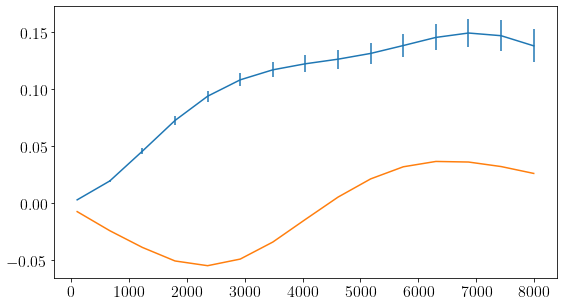

In [364]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
ax.plot(l,fac_l*cl_lensing)

### Fisher matrix forecasts

In [365]:
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)



In [366]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-5
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]
comps_list = [cl_tot,cl_lensing]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_tot + param_fiducial_values[1]*cl_lensing

for i in range(len(param_list)):
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot + delta_p_over_p*param_fiducial_values[i]*cl_lensing 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot - delta_p_over_p*param_fiducial_values[i]*cl_lensing 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_l*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_l*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)


In [367]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)

[0.01996138 0.02365312]


In [368]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

2snr, ie, the snr on ffree 100.1934962940638
the snr on bg 42.27772571179954


### Fisher matrix forecast with prior on bg

In [369]:
prior_list = [
              np.inf, # A_ksz
              0.01769, # bg green: 0.0352/2.23 = 0.01578 | bg blue: 0.0276/1.56 = 0.01769
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)


In [370]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

[0.01761943 0.01416631]
2snr, ie, the snr on ffree 113.5110511686231
the snr on bg 70.58998973367915


# Constraints on gas density profile parameters

In [378]:
M.get_f_b()

0.15745030410017352

## Planck x unWISE blue AGN

In [379]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas', # f_b_gas:## this is interpreted as fb*ffree
              'A_alpha',
              'A_beta',
              'sigma_log10M_HOD',
              'alpha_s_HOD',
              'M1_prime_HOD',
              'M_min_HOD',
              'x_out_truncated_nfw_profile_satellite_galaxies'
             ]

prior_list = [np.inf,#0.001596, #  f_b_gas ## this is interpreted as fb*ffree with 10% prior on ffree
              np.inf, # A_alpha
              np.inf, # A_beta
              0.25, # sigma_log10M_HOD
              0.10, # alpha_s_HOD
              5e12,  # Msun/h # M1_prime_HOD
              1e12,  #  Msun/h M_min
              0.25 # x_out_truncated_nfw_profile_satellite_galaxies
]

prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,#0.001596, #  f_b_gas ## this is interpreted as fb*ffree with 10% prior on ffree
              np.inf, # A_alpha
              np.inf, # A_beta
              0.25, # sigma_log10M_HOD
              0.10, # alpha_s_HOD
              5e12,  # Msun/h # M1_prime_HOD
              1e12,  #  Msun/h M_min
              0.25 # x_out_truncated_nfw_profile_satellite_galaxies
]

prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas, value from M.get_f_b()
                         0.88, # A_alpha
                         3.83, # A_beta
                         0.69, # sigma_log10M_HOD
                         1.30, # alpha_s_HOD
                         5.03e12, # Msun/h # M1_prime_HOD
                         6.25e11, # Msun/h M_min
                         1.09, # x_out_truncated_nfw_profile_satellite_galaxies
                        ]

fac = 1.

In [381]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 


'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 25.9939 seconds


### checking effective bias

In [382]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.456603062087112


### save data

In [383]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_planck_x_uwise_blue_filterA_nonlinvel_fsky0p6_bg1p46_sn8p93e-8_nl47uK_b5am_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [410]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_planck_x_uwise_blue_filterA_nonlinvel_fsky0p6_bg1p46_sn8p93e-8_nl47uK_b5am_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

1.7401087266984292
3.4802174533968584


### make plot

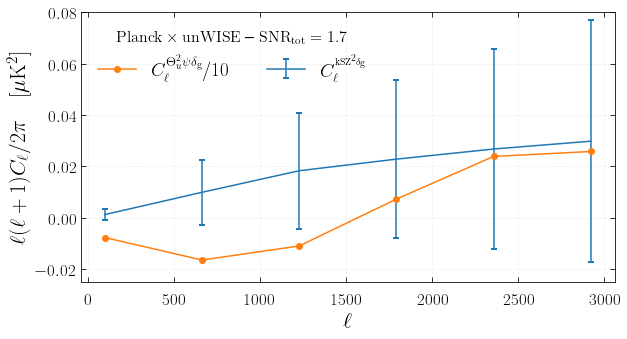

In [388]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}$')
ax.plot(l,
        fac_l*cl_lensing/10.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \delta_\mathrm{g}}/10$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=2,
          title=r'$\mathrm{Planck\times unWISE}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=1.7$')
ax.set_ylim(-0.025,0.08)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_planck_unwise.pdf')

### compute derivatives

In [389]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_g()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (T_cmb*1e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 51.8792 seconds
computed in 65.4087 seconds
computed in 56.4906 seconds
computed in 73.4137 seconds
computed in 59.4303 seconds
computed in 63.2007 seconds
computed in 68.3337 seconds
computed in 76.4125 seconds


Text(0.5, 1.0, 'derivatives Planck x unWISE blue - AGN')

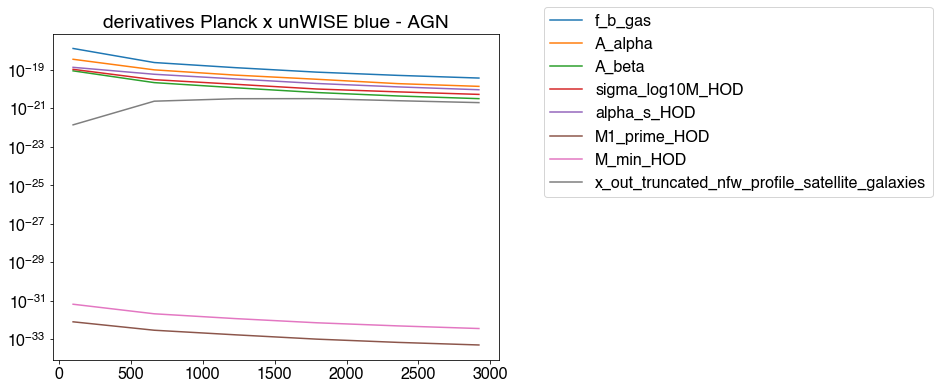

In [393]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives Planck x unWISE blue - AGN')

### save fisher matrix

In [398]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_planck_x_unwise_blue_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_planck_x_unwise_blue_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[ 4.88564776e+02  1.89612475e+02 -4.18808587e+01 -6.31218242e+01
   1.15457156e+02 -5.89226043e-12  4.22358061e-11 -1.43196519e+01]
 [ 1.89612475e+02  7.45826682e+01 -1.63880812e+01 -2.47844148e+01
   4.57302609e+01 -2.32563266e-12  1.66211158e-11 -5.66114786e+00]
 [-4.18808587e+01 -1.63880812e+01  3.61031997e+00  5.45632043e+00
  -1.00340483e+01  5.10898967e-13 -3.65486650e-12  1.24195373e+00]
 [-6.31218242e+01 -2.47844148e+01  5.45632043e+00  2.42970007e+01
  -1.52915136e+01  7.78761675e-13 -5.56415555e-12  1.95715808e+00]
 [ 1.15457156e+02  4.57302609e+01 -1.00340483e+01 -1.52915136e+01
   1.28341828e+02 -1.44004364e-12  1.02697171e-11 -3.62085935e+00]
 [-5.89226043e-12 -2.32563266e-12  5.10898967e-13  7.78761675e-13
  -1.44004364e-12  1.13267223e-25 -5.22888020e-25  1.85895160e-13]
 [ 4.22358061e-11  1.66211158e-11 -3.65486650e-12 -5.56415555e-12
   1.02697171e-11 -5.22888020e-25  4.73461657e-24 -1.32372738e-12]
 [-1.43196519e+01 -5.66114786e+00  1.24195373e+00  1.9571580

### get forecasts

In [403]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_planck_x_unwise_blue_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  0.18972269657486462 

A_alpha  =  0.2836396639624919 

A_beta  =  0.17507044237141242 

sigma_log10M_HOD  =  2.7631084928639207 

alpha_s_HOD  =  13.007985419884722 

M1_prime_HOD  =  1.012489468870628 

M_min_HOD  =  0.632583276896173 

x_out_truncated_nfw_profile_satellite_galaxies  =  4.379804239018531 



In [404]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_planck_x_unwise_blue_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.001799573156603 

A_alpha  =  0.38463298129563717 

A_beta  =  0.3699823463067355 

sigma_log10M_HOD  =  2.764018039915931 

alpha_s_HOD  =  13.017377564323931 

M1_prime_HOD  =  1.0149898061611622 

M_min_HOD  =  0.6339437469250002 

x_out_truncated_nfw_profile_satellite_galaxies  =  4.379830849173352 



## AdvACT x unWISE blue AGN

In [406]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas', # f_b_gas:## this is interpreted as fb*ffree
              'A_alpha',
              'A_beta',
              'sigma_log10M_HOD',
              'alpha_s_HOD',
              'M1_prime_HOD',
              'M_min_HOD',
              'x_out_truncated_nfw_profile_satellite_galaxies'
             ]

prior_list = [np.inf,#0.001596, #  f_b_gas ## this is interpreted as fb*ffree with 10% prior on ffree
              np.inf, # A_alpha
              np.inf, # A_beta
              0.25, # sigma_log10M_HOD
              0.10, # alpha_s_HOD
              5e12,  # Msun/h # M1_prime_HOD
              1e12,  #  Msun/h M_min
              0.25 # x_out_truncated_nfw_profile_satellite_galaxies
]

prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,#0.001596, #  f_b_gas ## this is interpreted as fb*ffree with 10% prior on ffree
              np.inf, # A_alpha
              np.inf, # A_beta
              0.25, # sigma_log10M_HOD
              0.10, # alpha_s_HOD
              5e12,  # Msun/h # M1_prime_HOD
              1e12,  #  Msun/h M_min
              0.25 # x_out_truncated_nfw_profile_satellite_galaxies
]

prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas, value from M.get_f_b()
                         0.88, # A_alpha
                         3.83, # A_beta
                         0.69, # sigma_log10M_HOD
                         1.30, # alpha_s_HOD
                         5.03e12, # Msun/h # M1_prime_HOD
                         6.25e11, # Msun/h M_min
                         1.09, # x_out_truncated_nfw_profile_satellite_galaxies
                        ]

fac = 1.

In [407]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p4arcmin_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p4arcmin_uK2_170422.txt',




'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 


'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 38.2830 seconds


### checking effective bias

In [408]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.456603062087112


### save data

In [409]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_advact_x_uwise_blue_filterA_nonlinvel_fsky0p3_bg1p46_sn8p93e-8_nl20uK_b1p4am_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [412]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_advact_x_uwise_blue_filterA_nonlinvel_fsky0p3_bg1p46_sn8p93e-8_nl20uK_b1p4am_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

18.669367316640763
37.338734633281526


### make plot

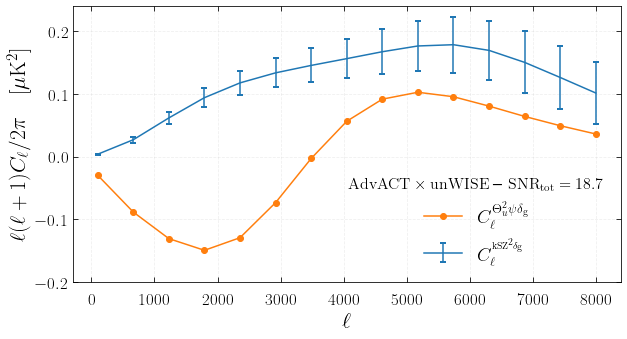

In [424]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \delta_\mathrm{g}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=1,
          loc=4,
          title=r'$\mathrm{AdvACT\times unWISE}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=18.7$')
ax.set_ylim(-0.2,0.24)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_advact_unwise.pdf')

### compute derivatives

In [425]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_g()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (T_cmb*1e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 78.3088 seconds
computed in 93.9087 seconds
computed in 89.3752 seconds
computed in 101.9111 seconds
computed in 98.4690 seconds
computed in 96.0260 seconds
computed in 107.9598 seconds
computed in 96.9460 seconds


Text(0.5, 1.0, 'derivatives AdvACT x unWISE blue - AGN')

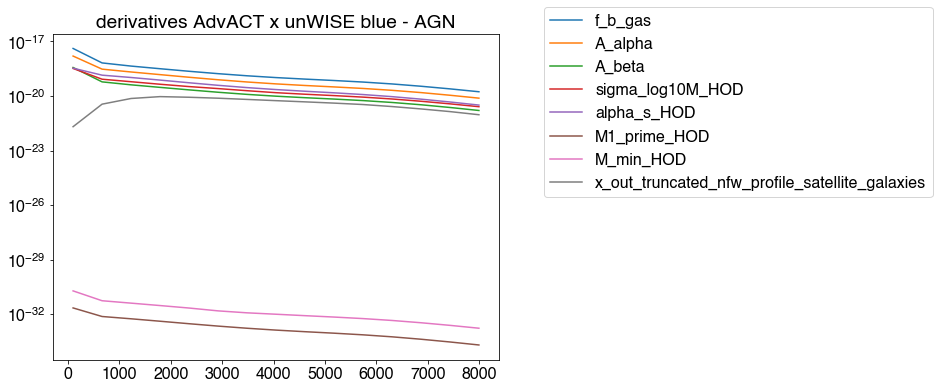

In [426]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives AdvACT x unWISE blue - AGN')

### save fisher matrix

In [427]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_advact_x_unwise_blue_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_advact_x_unwise_blue_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[ 5.62387288e+04  2.55204110e+04 -5.29089206e+03 -7.85825253e+03
   1.19391905e+04 -6.91019066e-10  5.12873334e-09 -2.06933999e+03]
 [ 2.55204110e+04  1.16088529e+04 -2.40197653e+03 -3.58234806e+03
   5.46379384e+03 -3.15725785e-10  2.33975020e-09 -9.43420493e+02]
 [-5.29089206e+03 -2.40197653e+03  4.97935475e+02  7.40813308e+02
  -1.12541436e+03  6.51582860e-11 -4.83539889e-10  1.96430157e+02]
 [-7.85825253e+03 -3.58234806e+03  7.40813308e+02  1.13163750e+03
  -1.69980874e+03  9.83999351e-11 -7.28771034e-10  3.04114776e+02]
 [ 1.19391905e+04  5.46379384e+03 -1.12541436e+03 -1.69980874e+03
   2.71466386e+03 -1.50634672e-10  1.11202007e-09 -4.53578602e+02]
 [-6.91019066e-10 -3.15725785e-10  6.51582860e-11  9.83999351e-11
  -1.50634672e-10  8.74150525e-24 -6.43420483e-23  2.66897425e-11]
 [ 5.12873334e-09  2.33975020e-09 -4.83539889e-10 -7.28771034e-10
   1.11202007e-09 -6.43420483e-23  4.77881346e-22 -1.98516432e-10]
 [-2.06933999e+03 -9.43420493e+02  1.96430157e+02  3.0411477

### get forecasts

In [428]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_advact_x_unwise_blue_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  0.33948968537598756 

A_alpha  =  2.191575346976943 

A_beta  =  0.7847285894066688 

sigma_log10M_HOD  =  2.8613486379516586 

alpha_s_HOD  =  13.143553139557993 

M1_prime_HOD  =  1.093541331301568 

M_min_HOD  =  0.8879016045838548 

x_out_truncated_nfw_profile_satellite_galaxies  =  4.490345577270412 



In [429]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_advact_x_unwise_blue_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.005761002866121 

A_alpha  =  2.466962495512186 

A_beta  =  2.73371180859661 

sigma_log10M_HOD  =  2.9023419311815077 

alpha_s_HOD  =  13.212309821990278 

M1_prime_HOD  =  1.1882084973407911 

M_min_HOD  =  0.980262328860423 

x_out_truncated_nfw_profile_satellite_galaxies  =  4.753799469249852 



## SO x unWISE blue AGN

In [430]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas', # f_b_gas:## this is interpreted as fb*ffree
              'A_alpha',
              'A_beta',
              'sigma_log10M_HOD',
              'alpha_s_HOD',
              'M1_prime_HOD',
              'M_min_HOD',
              'x_out_truncated_nfw_profile_satellite_galaxies'
             ]

prior_list = [np.inf,#0.001596, #  f_b_gas ## this is interpreted as fb*ffree with 10% prior on ffree
              np.inf, # A_alpha
              np.inf, # A_beta
              0.25, # sigma_log10M_HOD
              0.10, # alpha_s_HOD
              5e12,  # Msun/h # M1_prime_HOD
              1e12,  #  Msun/h M_min
              0.25 # x_out_truncated_nfw_profile_satellite_galaxies
]

prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,#0.001596, #  f_b_gas ## this is interpreted as fb*ffree with 10% prior on ffree
              np.inf, # A_alpha
              np.inf, # A_beta
              0.25, # sigma_log10M_HOD
              0.10, # alpha_s_HOD
              5e12,  # Msun/h # M1_prime_HOD
              1e12,  #  Msun/h M_min
              0.25 # x_out_truncated_nfw_profile_satellite_galaxies
]

prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas, value from M.get_f_b()
                         0.88, # A_alpha
                         3.83, # A_beta
                         0.69, # sigma_log10M_HOD
                         1.30, # alpha_s_HOD
                         5.03e12, # Msun/h # M1_prime_HOD
                         6.25e11, # Msun/h M_min
                         1.09, # x_out_truncated_nfw_profile_satellite_galaxies
                        ]

fac = 1.

In [431]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 38.0700 seconds


### checking effective bias

In [432]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.456603062087112


### save data

In [433]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_so_x_uwise_blue_filterA_nonlinvel_fsky0p4_bg1p46_sn8p93e-8_nlilc_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [434]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_so_x_uwise_blue_filterA_nonlinvel_fsky0p4_bg1p46_sn8p93e-8_nlilc_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

61.872941328370324
123.74588265674065


### make plot

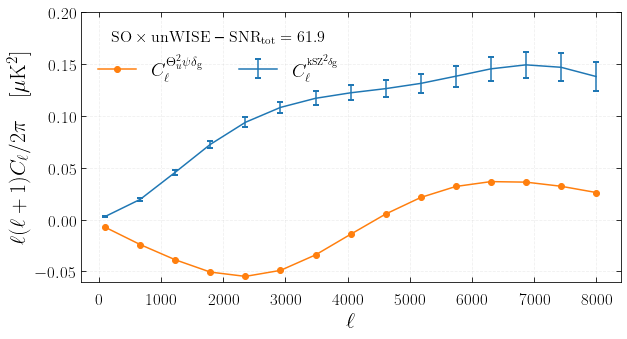

In [441]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \delta_\mathrm{g}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=2,
          title=r'$\mathrm{SO\times unWISE}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=61.9$')
ax.set_ylim(-0.06,0.2)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_so_unwise.pdf')

### compute derivatives

In [442]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_g()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (T_cmb*1e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 73.1147 seconds
computed in 102.8216 seconds
computed in 92.0136 seconds
computed in 93.6910 seconds
computed in 100.1525 seconds
computed in 100.9231 seconds
computed in 101.5782 seconds
computed in 104.7828 seconds


Text(0.5, 1.0, 'derivatives SO x unWISE blue - AGN')

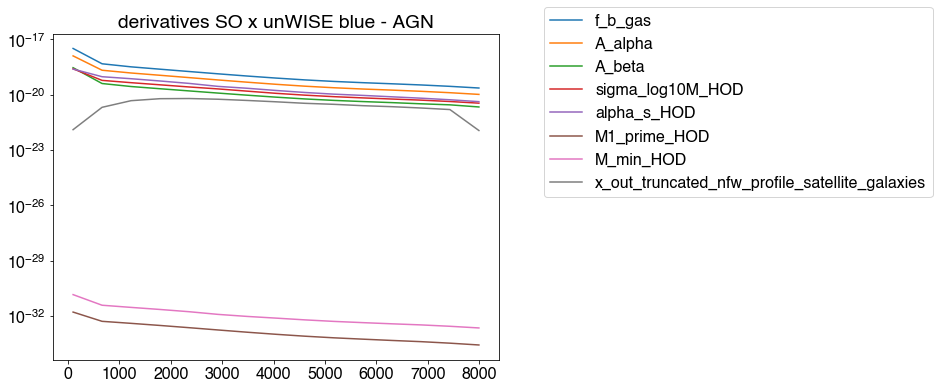

In [443]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives SO x unWISE blue - AGN')

### save fisher matrix

In [444]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_so_x_unwise_blue_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_so_x_unwise_blue_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[ 6.17700445e+05  2.81463183e+05 -5.60028873e+04 -8.70901836e+04
   1.25262972e+05 -7.53371665e-09  5.67193493e-08 -2.16332540e+04]
 [ 2.81463183e+05  1.28447698e+05 -2.55125048e+04 -3.98650182e+04
   5.74795146e+04 -3.45442172e-09  2.59762658e-08 -9.95075941e+03]
 [-5.60028873e+04 -2.55125048e+04  5.08496979e+03  7.90682718e+03
  -1.13379946e+04  6.83150129e-10 -5.14915651e-09  1.99208497e+03]
 [-8.70901836e+04 -3.98650182e+04  7.90682718e+03  1.25056109e+04
  -1.80220659e+04  1.08432930e-09 -8.14601732e-09  3.21129493e+03]
 [ 1.25262972e+05  5.74795146e+04 -1.13379946e+04 -1.80220659e+04
   2.63596224e+04 -1.57215049e-09  1.17735120e-08 -4.55716907e+03]
 [-7.53371665e-09 -3.45442172e-09  6.83150129e-10  1.08432930e-09
  -1.57215049e-09  9.44348031e-23 -7.07786014e-22  2.78267004e-10]
 [ 5.67193493e-08  2.59762658e-08 -5.14915651e-09 -8.14601732e-09
   1.17735120e-08 -7.07786014e-22  5.32094903e-21 -2.09599450e-09]
 [-2.16332540e+04 -9.95075941e+03  1.99208497e+03  3.2112949

### get forecasts

In [445]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_so_x_unwise_blue_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  0.7729198059107899 

A_alpha  =  2.066911695480858 

A_beta  =  3.7025317570754717 

sigma_log10M_HOD  =  3.0588975943558845 

alpha_s_HOD  =  13.5946941460734 

M1_prime_HOD  =  1.2044870167196078 

M_min_HOD  =  1.533515471380249 

x_out_truncated_nfw_profile_satellite_galaxies  =  7.661922304757906 



In [446]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_so_x_unwise_blue_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.029825772483346 

A_alpha  =  4.975762360408746 

A_beta  =  5.508849920248493 

sigma_log10M_HOD  =  3.2044814826557193 

alpha_s_HOD  =  13.595440010111137 

M1_prime_HOD  =  1.3186084186111335 

M_min_HOD  =  1.6030993697223435 

x_out_truncated_nfw_profile_satellite_galaxies  =  8.038372940590808 



## S4 x unWISE blue AGN

In [447]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas', # f_b_gas:## this is interpreted as fb*ffree
              'A_alpha',
              'A_beta',
              'sigma_log10M_HOD',
              'alpha_s_HOD',
              'M1_prime_HOD',
              'M_min_HOD',
              'x_out_truncated_nfw_profile_satellite_galaxies'
             ]

prior_list = [np.inf,#0.001596, #  f_b_gas ## this is interpreted as fb*ffree with 10% prior on ffree
              np.inf, # A_alpha
              np.inf, # A_beta
              0.25, # sigma_log10M_HOD
              0.10, # alpha_s_HOD
              5e12,  # Msun/h # M1_prime_HOD
              1e12,  #  Msun/h M_min
              0.25 # x_out_truncated_nfw_profile_satellite_galaxies
]

prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,#0.001596, #  f_b_gas ## this is interpreted as fb*ffree with 10% prior on ffree
              np.inf, # A_alpha
              np.inf, # A_beta
              0.25, # sigma_log10M_HOD
              0.10, # alpha_s_HOD
              5e12,  # Msun/h # M1_prime_HOD
              1e12,  #  Msun/h M_min
              0.25 # x_out_truncated_nfw_profile_satellite_galaxies
]

prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas, value from M.get_f_b()
                         0.88, # A_alpha
                         3.83, # A_beta
                         0.69, # sigma_log10M_HOD
                         1.30, # alpha_s_HOD
                         5.03e12, # Msun/h # M1_prime_HOD
                         6.25e11, # Msun/h M_min
                         1.09, # x_out_truncated_nfw_profile_satellite_galaxies
                        ]

fac = 1.

In [448]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'s4_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 43.6946 seconds


### checking effective bias

In [449]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.456603062087112


### save data

In [450]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_s4_x_uwise_blue_filterA_nonlinvel_fsky0p4_bg1p46_sn8p93e-8_nlilc_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [451]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_s4_x_uwise_blue_filterA_nonlinvel_fsky0p4_bg1p46_sn8p93e-8_nlilc_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

102.91370514767485
205.8274102953497


### make plot

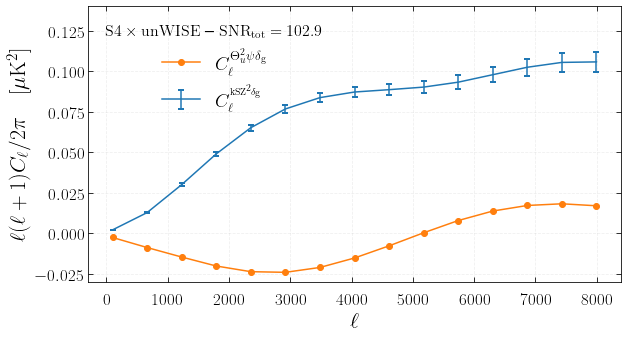

In [455]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \delta_\mathrm{g}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=1,
          loc=2,
          title=r'$\mathrm{S4\times unWISE}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=102.9$')
ax.set_ylim(-0.03,0.14)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_s4_unwise.pdf')

### compute derivatives

In [456]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_g()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (T_cmb*1e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 82.2603 seconds
computed in 110.3515 seconds
computed in 99.1903 seconds
computed in 105.6090 seconds
computed in 107.6433 seconds
computed in 111.8651 seconds
computed in 114.9358 seconds
computed in 114.8640 seconds


Text(0.5, 1.0, 'derivatives S4 x unWISE blue - AGN')

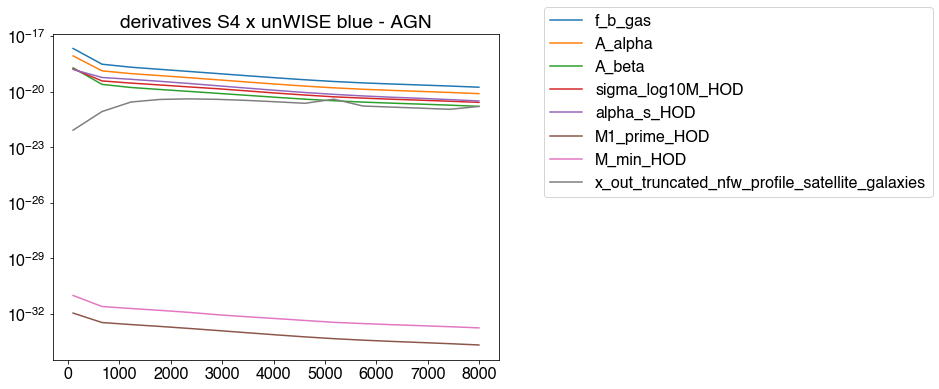

In [457]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives S4 x unWISE blue - AGN')

### save fisher matrix

In [458]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_s4_x_unwise_blue_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_s4_x_unwise_blue_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[ 1.70892130e+06  7.70613670e+05 -1.48117000e+05 -2.41912137e+05
   3.41878589e+05 -2.08346410e-08  1.57653990e-07 -6.81258547e+04]
 [ 7.70613670e+05  3.47913824e+05 -6.67714562e+04 -1.09565758e+05
   1.55124031e+05 -9.44908901e-09  7.14393881e-08 -3.10446264e+04]
 [-1.48117000e+05 -6.67714562e+04  1.28682546e+04  2.09764987e+04
  -2.95162482e+04  1.80307891e-09 -1.36678525e-08  6.03148489e+03]
 [-2.41912137e+05 -1.09565758e+05  2.09764987e+04  3.48578479e+04
  -4.94344305e+04  3.01202349e-09 -2.27480889e-08  1.01656344e+04]
 [ 3.41878589e+05  1.55124031e+05 -2.95162482e+04 -4.94344305e+04
   7.08931366e+04 -4.29435058e-09  3.23085578e-08 -1.40510265e+04]
 [-2.08346410e-08 -9.44908901e-09  1.80307891e-09  3.01202349e-09
  -4.29435058e-09  2.61154374e-22 -1.96799088e-21  8.72444578e-10]
 [ 1.57653990e-07  7.14393881e-08 -1.36678525e-08 -2.27480889e-08
   3.23085578e-08 -1.96799088e-21  1.48668029e-20 -6.65417472e-09]
 [-6.81258547e+04 -3.10446264e+04  6.03148489e+03  1.0165634

### get forecasts

In [459]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_s4_x_unwise_blue_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  1.116914970015317 

A_alpha  =  2.381535586649948 

A_beta  =  7.315259625459255 

sigma_log10M_HOD  =  3.2295177245962163 

alpha_s_HOD  =  13.418521852541465 

M1_prime_HOD  =  1.4625070289639486 

M_min_HOD  =  2.125905085212468 

x_out_truncated_nfw_profile_satellite_galaxies  =  18.48281779905463 



In [460]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_s4_x_unwise_blue_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.062181624789252 

A_alpha  =  7.17795057606084 

A_beta  =  7.829717104668164 

sigma_log10M_HOD  =  3.472678154183415 

alpha_s_HOD  =  13.419353823719636 

M1_prime_HOD  =  1.69075545938486 

M_min_HOD  =  2.1259540161189157 

x_out_truncated_nfw_profile_satellite_galaxies  =  19.395949196324146 



##  AdvACT x DES galaxy lensing

In [462]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]


prior_list = [np.inf, # f_b_gas
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [463]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',


'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p4arcmin_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p4arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
        
'full_path_to_source_dndz_gal' : path_to_kSZ2X_2022+'external_data/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 8,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 43.4077 seconds


### save data

In [464]:
cl_kSZ2X = M.cl_kSZ_kSZ_kg().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_advact_x_des_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [465]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_advact_x_des_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

3.6767197561857956
7.353439512371591


### make plot

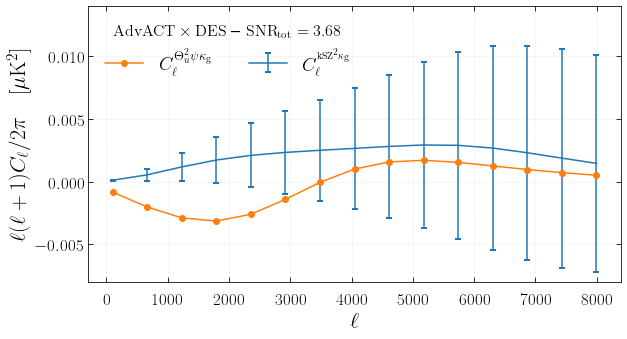

In [473]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{g}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=2,
          title=r'$\mathrm{AdvACT\times DES}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=3.68$')
ax.set_ylim(-0.008,0.014)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_advact_des.pdf')

### compute derivatives

In [474]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kg()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 85.0490 seconds
computed in 94.6989 seconds
computed in 96.7863 seconds


Text(0.5, 1.0, 'derivatives advact x DES lensing - AGN')

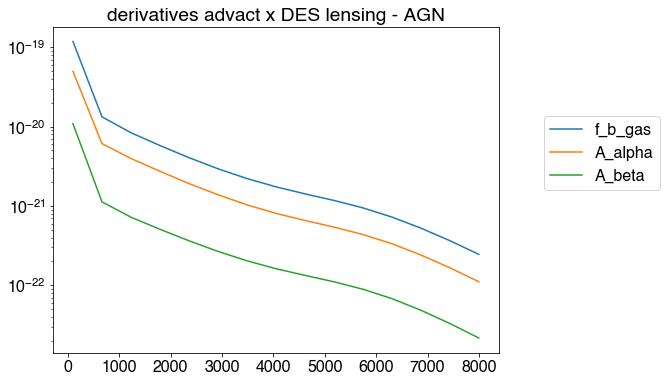

In [476]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives advact x DES lensing - AGN')

### save fisher matrix

In [477]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_advact_x_des_lensing_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_advact_x_des_lensing_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[2181.17649824  962.6902744  -197.33696017]
 [ 962.6902744   426.14075379  -87.0126258 ]
 [-197.33696017  -87.0126258    17.86924145]]
Inverse Fisher F^-1
[[  1.62469585  -1.18226381  12.18522126]
 [ -1.18226381   1.27001777  -6.87196298]
 [ 12.18522126  -6.87196298 101.15969298]]
sigmas
[ 1.27463557  1.12695065 10.05781751]
Fisher F
[[6214.96378107  962.6902744  -197.33696017]
 [ 962.6902744   426.14075379  -87.0126258 ]
 [-197.33696017  -87.0126258    17.86924145]]
Inverse Fisher F^-1
[[ 2.47868161e-04 -1.80369488e-04  1.85901158e-03]
 [-1.80369488e-04  4.09835552e-01  1.99366459e+00]
 [ 1.85901158e-03  1.99366459e+00  9.78445801e+00]]
sigmas
[0.01574383 0.640184   3.12801183]


### get forecasts

In [478]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_advact_x_des_lensing_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  0.12352574129525211 

A_alpha  =  0.780868265667079 

A_beta  =  0.3807983191056149 



In [479]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_advact_x_des_lensing_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.000762901337204 

A_alpha  =  1.3746048049611286 

A_beta  =  1.2244199216145106 



##  AdvACT x Rubin galaxy lensing

In [480]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]


prior_list = [np.inf, # f_b_gas
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [481]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',


'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p4arcmin_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p4arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
        
'full_path_to_source_dndz_gal' : path_to_kSZ2X_2022+'external_data/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 40.,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 42.7135 seconds


### save data

In [482]:
cl_kSZ2X = M.cl_kSZ_kSZ_kg().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_advact_x_rubin_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [483]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_advact_x_rubin_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

6.20836265515326
12.41672531030652


### make plot

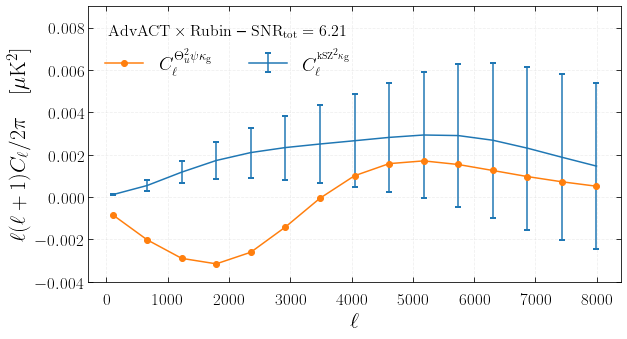

In [488]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{g}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=2,
          title=r'$\mathrm{AdvACT\times Rubin}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=6.21$')
ax.set_ylim(-0.004,0.009)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_advact_rubin.pdf')

### compute derivatives

In [489]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kg()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 83.4317 seconds
computed in 96.1269 seconds
computed in 96.8819 seconds


Text(0.5, 1.0, 'derivatives advact x Rubin lensing - AGN')

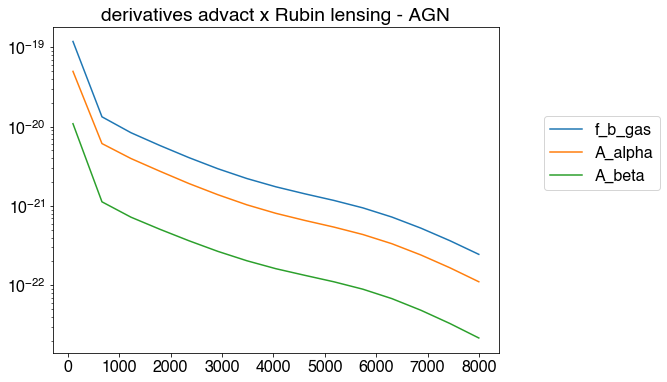

In [490]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives advact x Rubin lensing - AGN')

### save fisher matrix

In [491]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_advact_x_rubin_lensing_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_advact_x_rubin_lensing_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[6219.07591352 2819.01755859 -558.72576146]
 [2819.01755859 1280.90336668 -253.0655951 ]
 [-558.72576146 -253.0655951    50.25187503]]
Inverse Fisher F^-1
[[ 0.39451824 -0.32309099  2.75938543]
 [-0.32309099  0.41893159 -1.48257333]
 [ 2.75938543 -1.48257333 23.23398718]]
sigmas
[0.62810687 0.64724925 4.82016464]
Fisher F
[[10252.86319636  2819.01755859  -558.72576146]
 [ 2819.01755859  1280.90336668  -253.0655951 ]
 [ -558.72576146  -253.0655951     50.25187503]]
Inverse Fisher F^-1
[[ 2.47750302e-04 -2.02895285e-04  1.73284400e-03]
 [-2.02895285e-04  1.54502154e-01  7.75808198e-01]
 [ 1.73284400e-03  7.75808198e-01  3.94609251e+00]]
sigmas
[0.01574009 0.39306762 1.98647741]


### get forecasts

In [492]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_advact_x_rubin_lensing_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  0.25067438489359606 

A_alpha  =  1.3595998774162241 

A_beta  =  0.7945786676901151 



In [493]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_advact_x_rubin_lensing_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.003141388945862 

A_alpha  =  2.2388005424810635 

A_beta  =  1.9280360169448656 



##  SO x DES galaxy lensing

In [495]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]


prior_list = [np.inf, # f_b_gas
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [496]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',


'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
        
'full_path_to_source_dndz_gal' : path_to_kSZ2X_2022+'external_data/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 8,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 52.9832 seconds


### save data

In [497]:
cl_kSZ2X = M.cl_kSZ_kSZ_kg().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_so_x_des_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [498]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_so_x_des_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

11.215914140191924
22.431828280383847


### make plot

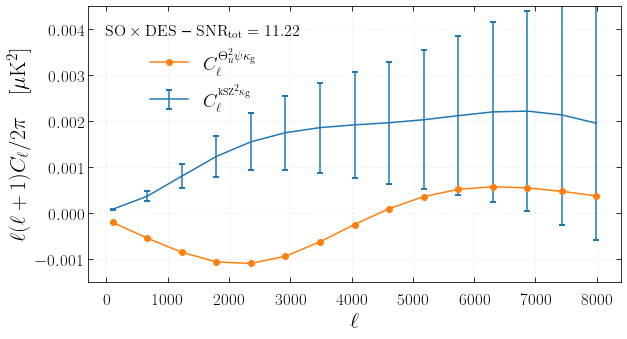

In [506]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{g}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=1,
          loc=2,
          title=r'$\mathrm{SO\times DES}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=11.22$')
ax.set_ylim(-0.0015,0.0045)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_so_des.pdf')

### compute derivatives

In [507]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kg()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 106.3897 seconds
computed in 112.8685 seconds
computed in 121.5505 seconds


Text(0.5, 1.0, 'derivatives SO x DES lensing - AGN')

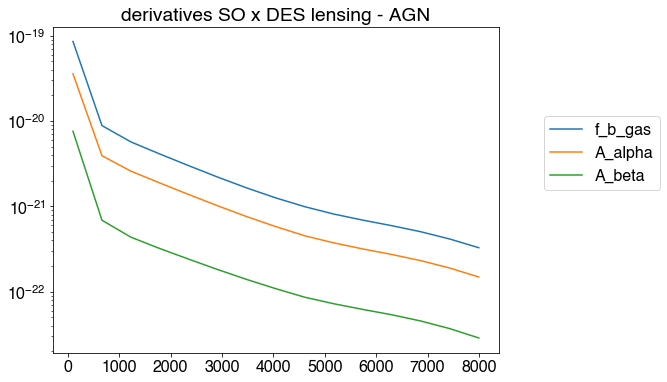

In [508]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives SO x DES lensing - AGN')

### save fisher matrix

In [509]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_so_x_des_lensing_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_so_x_des_lensing_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[20297.35077226  8807.68043868 -1733.62302439]
 [ 8807.68043868  3829.35376967  -750.96850867]
 [-1733.62302439  -750.96850867   148.53601851]]
Inverse Fisher F^-1
[[ 0.13712139 -0.18010508  0.68982293]
 [-0.18010508  0.26723155 -0.75100869]
 [ 0.68982293 -0.75100869  4.26098022]]
sigmas
[0.37029905 0.51694443 2.06421419]
Fisher F
[[24331.1380551   8807.68043868 -1733.62302439]
 [ 8807.68043868  3829.35376967  -750.96850867]
 [-1733.62302439  -750.96850867   148.53601851]]
Inverse Fisher F^-1
[[ 2.47458595e-04 -3.25029895e-04  1.24490143e-03]
 [-3.25029895e-04  3.10955118e-02  1.53419157e-01]
 [ 1.24490143e-03  1.53419157e-01  7.96918800e-01]]
sigmas
[0.01573082 0.1763392  0.89270309]


### get forecasts

In [510]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_so_x_des_lensing_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  0.4251976962313713 

A_alpha  =  1.7023106225177485 

A_beta  =  1.8554276108518621 



In [511]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_so_x_des_lensing_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.009035571965988 

A_alpha  =  4.990382307375556 

A_beta  =  4.290340271437371 



## SO x Rubin galaxy lensing

In [512]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]


prior_list = [np.inf, # f_b_gas
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [513]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',



'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
        
'full_path_to_source_dndz_gal' : path_to_kSZ2X_2022+'external_data/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 40.,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 51.9233 seconds


### save data

In [514]:
cl_kSZ2X = M.cl_kSZ_kSZ_kg().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_so_x_rubin_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [515]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_so_x_rubin_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

18.807085618865894
37.61417123773179


### make plot

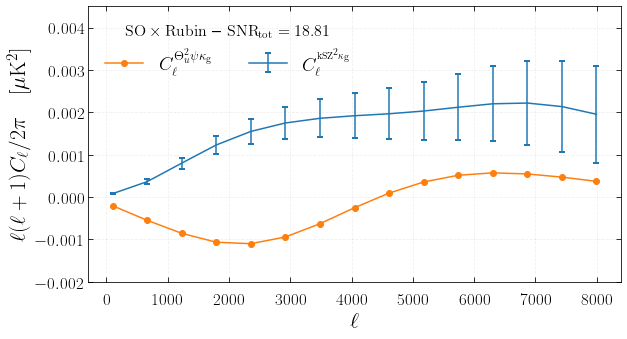

In [519]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{g}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=2,
          title=r'$\mathrm{SO\times Rubin}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=18.81$')
ax.set_ylim(-0.002,0.0045)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_so_rubin.pdf')

### compute derivatives

In [520]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kg()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 116.0217 seconds
computed in 126.4386 seconds
computed in 130.5587 seconds


Text(0.5, 1.0, 'derivatives SO x Rubin lensing - AGN')

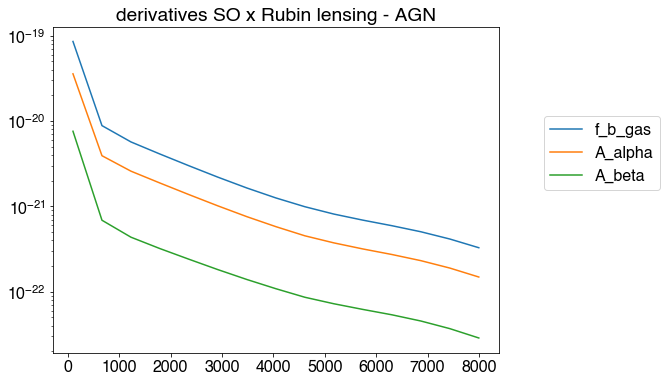

In [521]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives SO x Rubin lensing - AGN')

### save fisher matrix

In [522]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_so_x_rubin_lensing_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_so_x_rubin_lensing_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[57070.54095494 25331.66781618 -4775.60807389]
 [25331.66781618 11263.10723288 -2116.83217827]
 [-4775.60807389 -2116.83217827   401.08876603]]
Inverse Fisher F^-1
[[ 0.03216041 -0.04497907  0.14553485]
 [-0.04497907  0.07388756 -0.1455908 ]
 [ 0.14553485 -0.1455908   0.96693338]]
sigmas
[0.17933325 0.27182267 0.98332771]
Fisher F
[[61104.32823777 25331.66781618 -4775.60807389]
 [25331.66781618 11263.10723288 -2116.83217827]
 [-4775.60807389 -2116.83217827   401.08876603]]
Inverse Fisher F^-1
[[ 2.46009637e-04 -3.44065357e-04  1.11326227e-03]
 [-3.44065357e-04  1.14617218e-02  5.63950483e-02]
 [ 1.11326227e-03  5.63950483e-02  3.13385385e-01]]
sigmas
[0.01568469 0.10705943 0.55980835]


### get forecasts

In [523]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_so_x_rubin_lensing_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  0.8779760819603285 

A_alpha  =  3.237404755486878 

A_beta  =  3.8949375310330225 



In [524]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_so_x_rubin_lensing_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.038468110249413 

A_alpha  =  8.219733550231538 

A_beta  =  6.841627184476182 



##  S4 x DES galaxy lensing

In [525]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]


prior_list = [np.inf, # f_b_gas
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [526]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',


'ksz_filter_file' : path_to_kSZ2X_2022+'s4_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
        
'full_path_to_source_dndz_gal' : path_to_kSZ2X_2022+'external_data/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 8,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 57.1369 seconds


### save data

In [527]:
cl_kSZ2X = M.cl_kSZ_kSZ_kg().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_s4_x_des_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [528]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_s4_x_des_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

17.742639044533124
35.48527808906625


### make plot

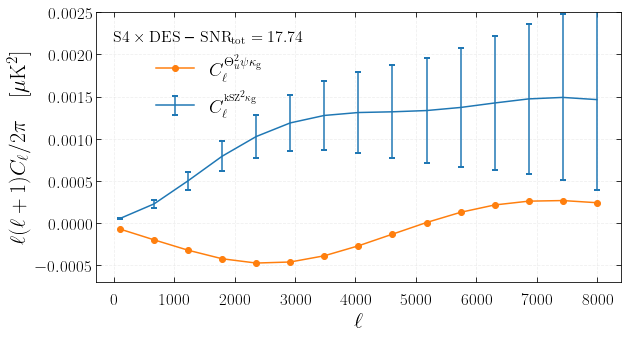

In [533]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{g}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=1,
          loc=2,
          title=r'$\mathrm{S4\times DES}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=17.74$')
ax.set_ylim(-0.0007,0.0025)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_s4_des.pdf')

### compute derivatives

In [534]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kg()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 120.5216 seconds
computed in 138.7986 seconds
computed in 142.6164 seconds


Text(0.5, 1.0, 'derivatives S4 x DES lensing - AGN')

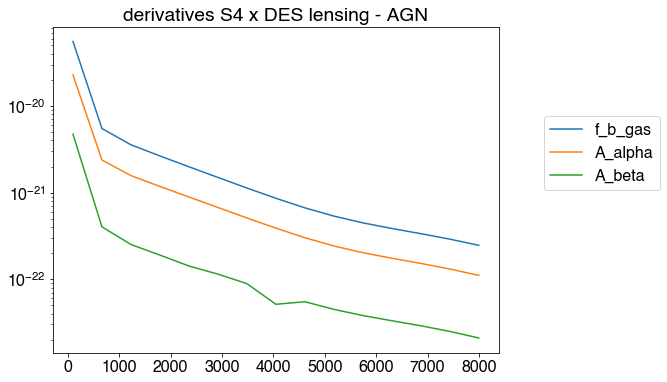

In [535]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives S4 x DES lensing - AGN')

### save fisher matrix

In [536]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_s4_x_des_lensing_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_s4_x_des_lensing_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[50793.284475   21602.23954482 -4085.14015444]
 [21602.23954482  9202.85425062 -1733.22911486]
 [-4085.14015444 -1733.22911486   330.76541679]]
Inverse Fisher F^-1
[[ 0.04663422 -0.07571975  0.17918329]
 [-0.07571975  0.13123508 -0.24750271]
 [ 0.17918329 -0.24750271  0.91911044]]
sigmas
[0.21594957 0.36226382 0.95870248]
Fisher F
[[54827.07175783 21602.23954482 -4085.14015444]
 [21602.23954482  9202.85425062 -1733.22911486]
 [-4085.14015444 -1733.22911486   330.76541679]]
Inverse Fisher F^-1
[[ 0.0002466  -0.0004004   0.0009475 ]
 [-0.0004004   0.00893941  0.04189788]
 [ 0.0009475   0.04189788  0.23427261]]
sigmas
[0.01570335 0.09454844 0.48401716]


### get forecasts

In [537]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_s4_x_des_lensing_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  0.7291068180396886 

A_alpha  =  2.429168859611742 

A_beta  =  3.9949828990235634 



In [538]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_s4_x_des_lensing_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.026544606798087 

A_alpha  =  9.307398637103116 

A_beta  =  7.91294253630678 



## S4 x Rubin galaxy lensing

In [539]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]


prior_list = [np.inf, # f_b_gas
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [540]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',



'ksz_filter_file' : path_to_kSZ2X_2022+'s4_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
        
'full_path_to_source_dndz_gal' : path_to_kSZ2X_2022+'external_data/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 40.,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 61.5786 seconds


### save data

In [541]:
cl_kSZ2X = M.cl_kSZ_kSZ_kg().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_s4_x_rubin_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [542]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_s4_x_rubin_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

29.717496998355077
59.434993996710155


### make plot

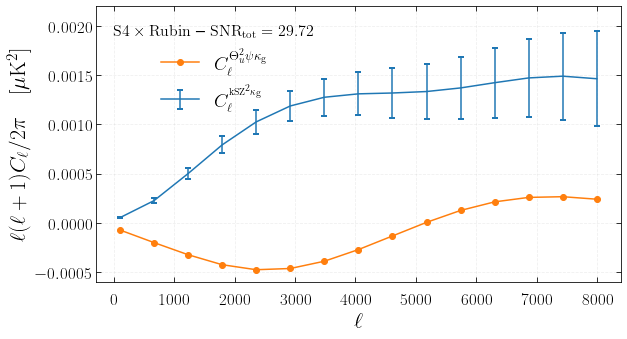

In [551]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{g}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=1,
          loc=2,
          title=r'$\mathrm{S4\times Rubin}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=29.72$')
ax.set_ylim(-0.00060,0.0022)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_s4_rubin.pdf')

### compute derivatives

In [552]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kg()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 121.1648 seconds
computed in 136.6884 seconds
computed in 149.4050 seconds


Text(0.5, 1.0, 'derivatives S4 x Rubin lensing - AGN')

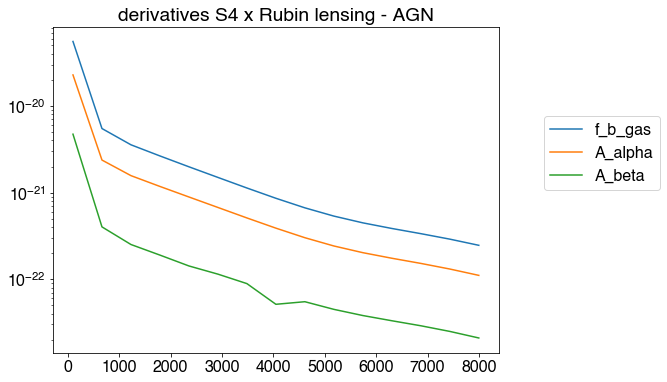

In [553]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives S4 x Rubin lensing - AGN')

### save fisher matrix

In [554]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_s4_x_rubin_lensing_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_s4_x_rubin_lensing_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[142493.68546653  61903.45579593 -11091.15641668]
 [ 61903.45579593  26934.16529318  -4808.70184911]
 [-11091.15641668  -4808.70184911    870.52839076]]
Inverse Fisher F^-1
[[ 0.01093414 -0.0187561   0.03570221]
 [-0.0187561   0.03486594 -0.04637063]
 [ 0.03570221 -0.04637063  0.19987428]]
sigmas
[0.10456646 0.18672425 0.44707301]
Fisher F
[[146527.47274936  61903.45579593 -11091.15641668]
 [ 61903.45579593  26934.16529318  -4808.70184911]
 [-11091.15641668  -4808.70184911    870.52839076]]
Inverse Fisher F^-1
[[ 0.00024241 -0.00041582  0.00079152]
 [-0.00041582  0.00340557  0.01351412]
 [ 0.00079152  0.01351412  0.08588375]]
sigmas
[0.01556952 0.05835729 0.2930593 ]


### get forecasts

In [555]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_s4_x_rubin_lensing_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  1.505743898104351 

A_alpha  =  4.712831943748745 

A_beta  =  8.566833404801367 



In [556]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_s4_x_rubin_lensing_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.112727855859571 

A_alpha  =  15.079522457699998 

A_beta  =  13.069027449084833 



## SO CMB lensing

In [557]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]


prior_list = [np.inf, # f_b_gas
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [558]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_covmat,kSZ_kSZ_lens_lensing_term',




'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 5000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
        
'cmb_lensing_noise_file': path_to_kSZ2X_2022+'external_data/so_lensing_noise.dat',


      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 29.0526 seconds


### save data

In [559]:
cl_kSZ2X = M.cl_kSZ_kSZ_kcmb().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_so_cmb_lensing_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [560]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_so_cmb_lensing_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

16.389657430318326
32.77931486063665


### make plot

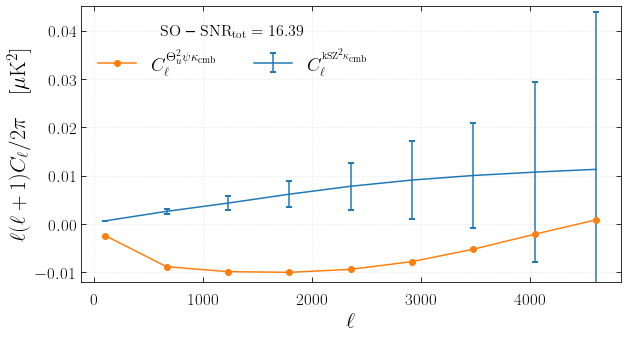

In [564]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{cmb}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{cmb}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=2,
          title=r'$\mathrm{SO}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=16.39$')
ax.set_ylim(-0.012,0.045)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_so_cmb_lensing.pdf')

### compute derivatives

In [565]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kcmb()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kcmb()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kcmb()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 61.7889 seconds
computed in 71.0912 seconds
computed in 74.6838 seconds


Text(0.5, 1.0, 'derivatives SO CMB lensing - AGN')

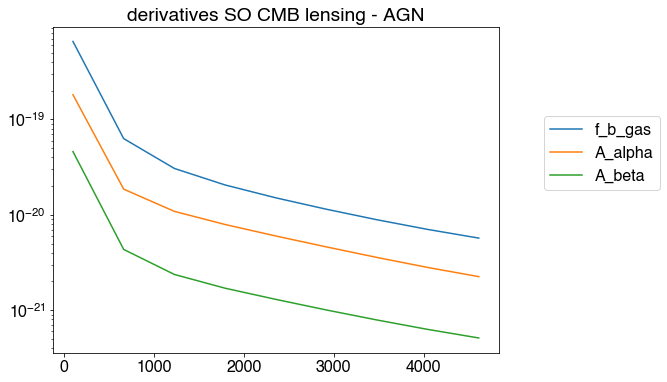

In [566]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives SO CMB lensing - AGN')

### save fisher matrix

In [567]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_so_cmb_lensing_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_so_cmb_lensing_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[43341.20525085 12386.56036289 -3074.78331356]
 [12386.56036289  3570.15812305  -882.19781809]
 [-3074.78331356  -882.19781809   218.58817216]]
Inverse Fisher F^-1
[[ 0.02823048  0.0666926   0.66626975]
 [ 0.0666926   0.26059885  1.98988366]
 [ 0.66626975  1.98988366 17.40764887]]
sigmas
[0.1680193  0.51048883 4.17224746]
Fisher F
[[47374.99253368 12386.56036289 -3074.78331356]
 [12386.56036289  3570.15812305  -882.19781809]
 [-3074.78331356  -882.19781809   218.58817216]]
Inverse Fisher F^-1
[[2.45747947e-04 5.80562851e-04 5.79991568e-03]
 [5.80562851e-04 1.04413639e-01 4.29568484e-01]
 [5.79991568e-03 4.29568484e-01 1.81985081e+00]]
sigmas
[0.01567635 0.32313099 1.34901846]


### get forecasts

In [568]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_so_cmb_lensing_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  0.9370965634241539 

A_alpha  =  1.7238379130440231 

A_beta  =  0.9179704790554826 



In [569]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_so_cmb_lensing_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.043811525968685 

A_alpha  =  2.723353737063971 

A_beta  =  2.839101245873251 



## S4 CMB lensing

In [570]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]


prior_list = [np.inf, # f_b_gas
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [571]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_covmat,kSZ_kSZ_lens_lensing_term',




'ksz_filter_file' : path_to_kSZ2X_2022+'s4_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 5000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
        
'cmb_lensing_noise_file': path_to_kSZ2X_2022+'external_data/s4_lensing_noise.dat',


      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 30.4183 seconds


### save data

In [572]:
cl_kSZ2X = M.cl_kSZ_kSZ_kcmb().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_s4_cmb_lensing_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [573]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_s4_cmb_lensing_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

34.516268898726885
69.03253779745377


### make plot

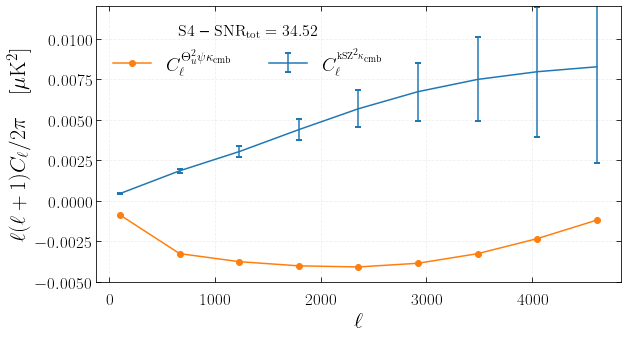

In [576]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{cmb}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{cmb}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=2,
          title=r'$\mathrm{S4}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=34.52$')
ax.set_ylim(-0.005,0.012)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_s4_cmb_lensing.pdf')

### compute derivatives

In [577]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kcmb()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kcmb()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kcmb()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 61.2332 seconds
computed in 74.0021 seconds
computed in 74.4653 seconds


Text(0.5, 1.0, 'derivatives S4 CMB lensing - AGN')

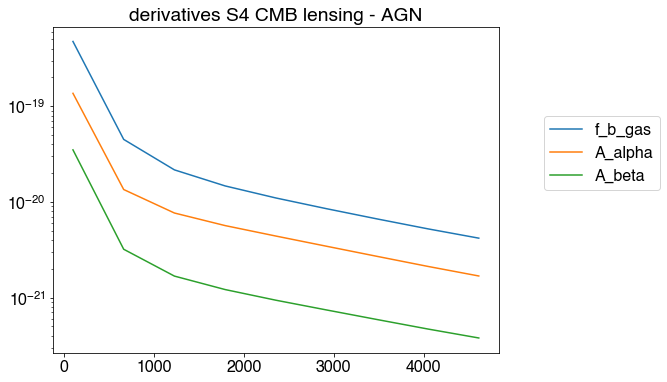

In [578]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives S4 CMB lensing - AGN')

### save fisher matrix

In [579]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_s4_cmb_lensing_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_s4_cmb_lensing_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[192265.88649275  58244.03343421 -14287.64538629]
 [ 58244.03343421  17848.21436304  -4348.2034797 ]
 [-14287.64538629  -4348.2034797    1064.21655131]]
Inverse Fisher F^-1
[[0.0043008  0.00694707 0.08612496]
 [0.00694707 0.02338522 0.1888159 ]
 [0.08612496 0.1888159  1.92867962]]
sigmas
[0.06558049 0.15292228 1.3887691 ]
Fisher F
[[196299.67377558  58244.03343421 -14287.64538629]
 [ 58244.03343421  17848.21436304  -4348.2034797 ]
 [-14287.64538629  -4348.2034797    1064.21655131]]
Inverse Fisher F^-1
[[2.34395028e-04 3.78617620e-04 4.69383744e-03]
 [3.78617620e-04 1.27752176e-02 5.72804471e-02]
 [4.69383744e-03 5.72804471e-02 2.97994730e-01]]
sigmas
[0.01530996 0.11302751 0.54588894]


### get forecasts

In [580]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_s4_cmb_lensing_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  2.400870990094658 

A_alpha  =  5.754557256936443 

A_beta  =  2.757837854927564 



In [581]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_s4_cmb_lensing_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.284171406150248 

A_alpha  =  7.785715306742304 

A_beta  =  7.0160791842527335 



## S4 CMB lensing - check derivs - cut l<500

In [582]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]


prior_list = [np.inf, # f_b_gas
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [583]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_covmat,kSZ_kSZ_lens_lensing_term',




'ksz_filter_file' : path_to_kSZ2X_2022+'s4_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 5000.0,
'ell_min' : 500.0,
'f_sky':0.4, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
        
'cmb_lensing_noise_file': path_to_kSZ2X_2022+'external_data/s4_lensing_noise.dat',


      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 29.2706 seconds


### save data

In [584]:
cl_kSZ2X = M.cl_kSZ_kSZ_kcmb().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_s4_cmb_lensing_check_der_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [585]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_s4_cmb_lensing_check_der_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

23.290442669391176
46.58088533878235


### make plot

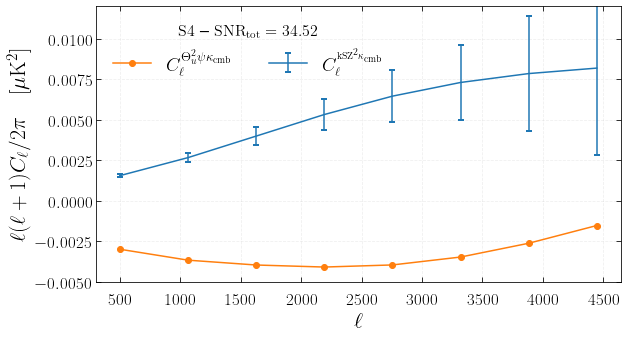

In [586]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{cmb}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{cmb}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=2,
          title=r'$\mathrm{S4}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=34.52$')
ax.set_ylim(-0.005,0.012)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_s4_cmb_lensing_check_der.pdf')

### compute derivatives

In [587]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kcmb()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kcmb()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kcmb()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 59.2286 seconds
computed in 70.8305 seconds
computed in 72.4623 seconds


Text(0.5, 1.0, 'derivatives S4 CMB lensing - AGN check derivatives')

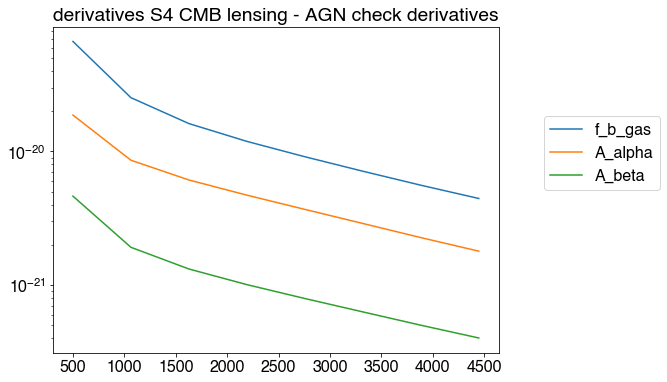

In [588]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives S4 CMB lensing - AGN check derivatives')

### save fisher matrix

In [589]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_s4_cmb_lensing_check_der_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_s4_cmb_lensing_check_der_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[87519.47339062 27697.19591003 -6463.63965478]
 [27697.19591003  8944.68112669 -2069.25717338]
 [-6463.63965478 -2069.25717338   480.56872314]]
Inverse Fisher F^-1
[[ 0.01535769  0.05930912  0.46193688]
 [ 0.05930912  0.25780446  1.90777395]
 [ 0.46193688  1.90777395 14.42971238]]
sigmas
[0.12392616 0.50774448 3.79864612]
Fisher F
[[91553.26067345 27697.19591003 -6463.63965478]
 [27697.19591003  8944.68112669 -2069.25717338]
 [-6463.63965478 -2069.25717338   480.56872314]]
Inverse Fisher F^-1
[[2.43967821e-04 9.42167236e-04 7.33819374e-03]
 [9.42167236e-04 3.24000295e-02 1.52181820e-01]
 [7.33819374e-03 1.52181820e-01 7.56051623e-01]]
sigmas
[0.01561947 0.18000008 0.86951229]


### get forecasts

In [590]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_s4_cmb_lensing_check_der_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  1.270517055495115 

A_alpha  =  1.7331552159794068 

A_beta  =  1.0082539607145635 



In [591]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_s4_cmb_lensing_check_der_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.080387571333896 

A_alpha  =  4.88888666015398 

A_beta  =  4.404768100141311 



# Contour Plots

## advact,so,s4 x unwise blue

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


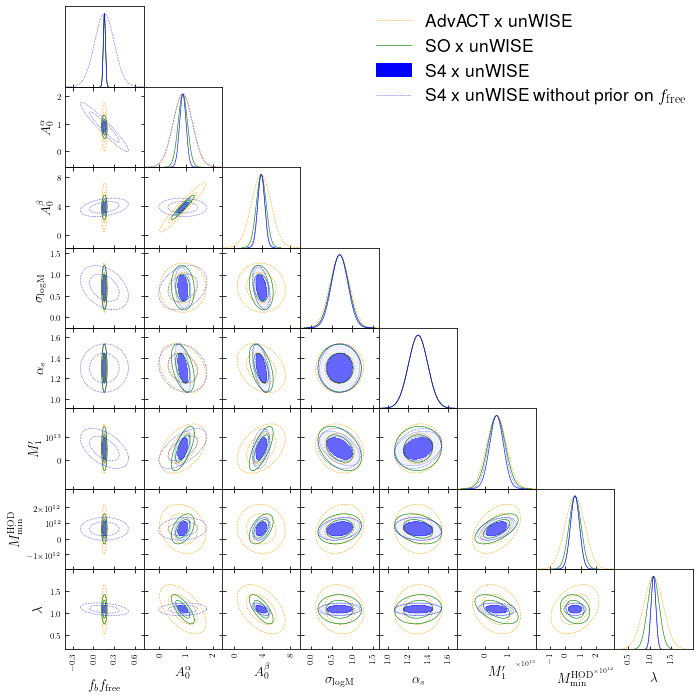

In [594]:
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
              'sigma_log10M_HOD',
              'alpha_s_HOD',
              'M1_prime_HOD',
              'M_min_HOD',
              'x_out_truncated_nfw_profile_satellite_galaxies'
             ]


param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                         0.69, # sigma_log10M_HOD
                         1.30, # alpha_s_HOD
                         5.03e12, # Msun/h # M1_prime_HOD
                         6.25e11, # Msun/h M_min
                         1.09, # x_out_truncated_nfw_profile_satellite_galaxies
                        ]


# plot ellipses
plt.rcParams['text.usetex'] = True
inverse_fisher_F_advact = np.load(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_advact_x_unwise_blue_agn_ffree10pc_180422.npy')
inverse_fisher_F_so = np.load(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_so_x_unwise_blue_agn_ffree10pc_180422.npy')
inverse_fisher_F_s4 = np.load(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_s4_x_unwise_blue_agn_ffree10pc_180422.npy')
inverse_fisher_F_s4_no_prior = np.load(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_s4_x_unwise_blue_agn_180422.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_b f_\mathrm{free}', r'$A^{\alpha}_0$',r'$A^{\beta}_0$',r'\sigma_\mathrm{log M}', r'\alpha_s',
         r'M_1^\prime', r'M_\mathrm{min}^\mathrm{HOD}', r'\lambda']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method

matrix1 = GaussianND(mean, inverse_fisher_F_advact, 
                     labels = labels, 
                     names = names)

matrix2 = GaussianND(mean, 
                     inverse_fisher_F_so, 
                     labels = labels, 
                     names = names)


matrix3 = GaussianND(mean, 
                     inverse_fisher_F_s4, 
                     labels = labels, 
                     names = names)

matrix4 = GaussianND(mean, 
                     inverse_fisher_F_s4_no_prior, 
                     labels = labels, 
                     names = names)


# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.fig_width_inch = 10
# g.settings.constrained_layout = True
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 22
g.settings.axes_labelsize = 18
g.settings.axes_fontsize = 13
g.settings.axis_tick_x_rotation = 90
# g.settings.axis_tick_y_rotation = 45

# g.settings.alpha_filled_add = 0.9
# g.settings.title_limit_fontsize = 1

g.settings.solid_contour_palefactor = 0.9
g.settings.alpha_filled_add = 0.6

g.triangle_plot([matrix1,
                 matrix2,
                 matrix3,
                 matrix4], 
                names,
            filled = [False,False,True,False],
            legend_labels = ['AdvACT x unWISE' , 
                             'SO x unWISE', 
                             'S4 x unWISE',
                             'S4 x unWISE without prior on $f_\mathrm{free}$'], 
            contour_ls =  ['--', '-','-',':'],
            legend_loc='upper right', 
            contour_colors = ['orange','green','blue','blue'])

# Save triplot
g.export(path_to_kSZ2X_2022+'advact_so_s4_unwise_blue_fb_prior.pdf')

## AdvACT x DES vs AdvACT x Rubin

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


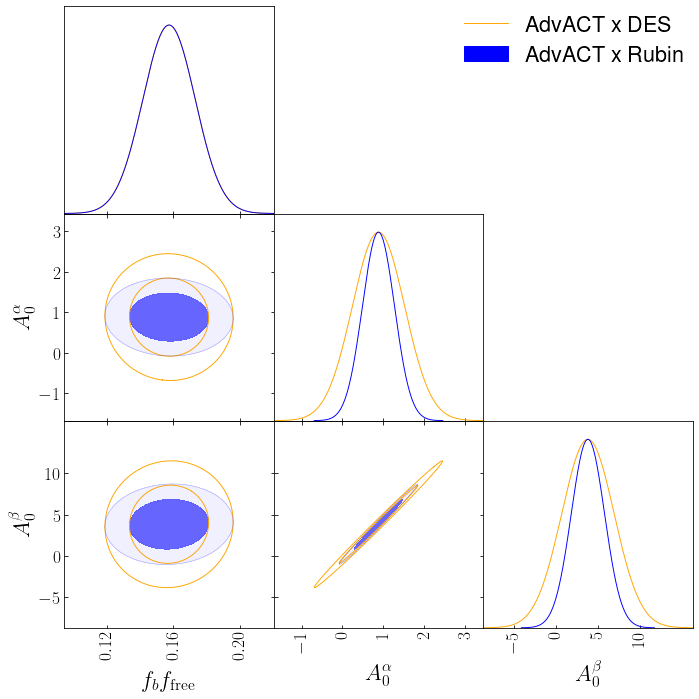

In [596]:

param_list = ['f_b_gas',
              'A_alpha',
              'A_beta'
             ]


param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83  # A_beta
                        ]





# plot ellipses
plt.rcParams['text.usetex'] = True
inverse_fisher_F_advact_lsst = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_advact_x_rubin_lensing_agn_ffree10pc_180422.npy')
inverse_fisher_F_advact_des = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_advact_x_des_lensing_agn_ffree10pc_180422.npy')
# inverse_fisher_F_s4 = np.load('test_fisher_s4_unwise_blue_fb_prior.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_b f_\mathrm{free}', r'$A^{\alpha}_0$',r'$A^{\beta}_0$']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method

matrix1 = GaussianND(mean, inverse_fisher_F_advact_des, 
                     labels = labels, 
                     names = names)

matrix2 = GaussianND(mean, 
                     inverse_fisher_F_advact_lsst, 
                     labels = labels, 
                     names = names)



# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.fig_width_inch = 10
# g.settings.constrained_layout = True
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 22
g.settings.axes_labelsize = 23
g.settings.axes_fontsize = 18
g.settings.axis_tick_x_rotation = 90
# g.settings.axis_tick_y_rotation = 45

# g.settings.alpha_filled_add = 0.9
# g.settings.title_limit_fontsize = 1

g.settings.solid_contour_palefactor = 0.9
g.settings.alpha_filled_add = 0.6

g.triangle_plot([matrix1,
                 matrix2], 
                names,
            filled = [False,True],
            legend_labels = ['AdvACT x DES' , 
                             'AdvACT x Rubin'], 
            contour_ls =  ['-','-'],
            legend_loc='upper right', 
            contour_colors = ['orange','blue'])

# Save triplot
g.export(path_to_kSZ2X_2022+'advact_des_lsst_fb_prior.pdf')

## AdvACT, SO, S4 x Rubin

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


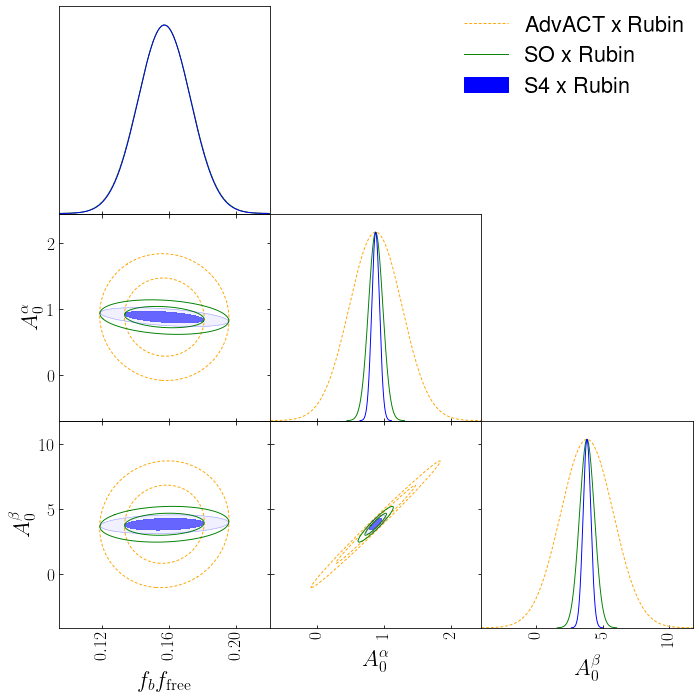

In [597]:
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta'
             ]


param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83  # A_beta
                        ]






# plot ellipses
plt.rcParams['text.usetex'] = True
inverse_fisher_F_advact_lsst = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_advact_x_rubin_lensing_agn_ffree10pc_180422.npy')
inverse_fisher_F_so_lsst = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_so_x_rubin_lensing_agn_ffree10pc_180422.npy')
inverse_fisher_F_s4_lsst = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_s4_x_rubin_lensing_agn_ffree10pc_180422.npy')
# inverse_fisher_F_s4 = np.load('test_fisher_s4_unwise_blue_fb_prior.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_b f_\mathrm{free}', r'$A^{\alpha}_0$',r'$A^{\beta}_0$']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method

matrix1 = GaussianND(mean, inverse_fisher_F_advact_lsst, 
                     labels = labels, 
                     names = names)

matrix2 = GaussianND(mean, 
                     inverse_fisher_F_so_lsst, 
                     labels = labels, 
                     names = names)

matrix3 = GaussianND(mean, 
                     inverse_fisher_F_s4_lsst, 
                     labels = labels, 
                     names = names)


# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.fig_width_inch = 10
# g.settings.constrained_layout = True
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 22
g.settings.axes_labelsize = 23
g.settings.axes_fontsize = 18
g.settings.axis_tick_x_rotation = 90
# g.settings.axis_tick_y_rotation = 45

# g.settings.alpha_filled_add = 0.9
# g.settings.title_limit_fontsize = 1

g.settings.solid_contour_palefactor = 0.9
g.settings.alpha_filled_add = 0.6

g.triangle_plot([matrix1,
                 matrix2,
                 matrix3], 
                names,
            filled = [False,False,True],
            legend_labels = ['AdvACT x Rubin' , 
                             'SO x Rubin',
                             'S4 x Rubin'], 
            contour_ls =  ['--','-','-'],
            legend_loc='upper right', 
            contour_colors = ['orange','green','blue'])

# Save triplot
g.export(path_to_kSZ2X_2022+'advact_so_s4_lsst_fb_prior.pdf')

## SO x Rubin with and without ffree prior

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


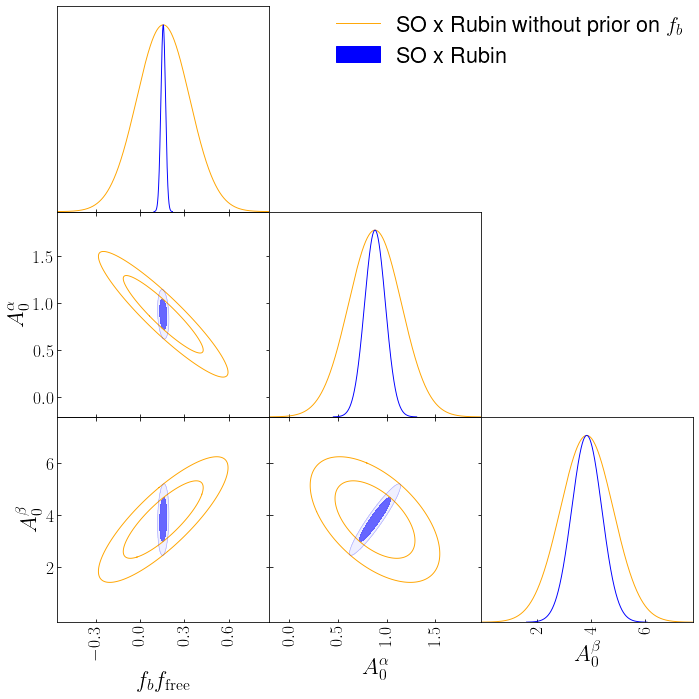

In [599]:
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta'
             ]


param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83  # A_beta
                        ]








# plot ellipses
plt.rcParams['text.usetex'] = True
# inverse_fisher_F_advact_lsst = np.load('test_fisher_advact_lsst_fb_without_prior.npy')
inverse_fisher_F_so_lsst_with_prior = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_so_x_rubin_lensing_agn_ffree10pc_180422.npy')
inverse_fisher_F_so_lsst_without_prior = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_so_x_rubin_lensing_agn_180422.npy')
# inverse_fisher_F_s4 = np.load('test_fisher_s4_unwise_blue_fb_prior.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_b f_\mathrm{free}', r'$A^{\alpha}_0$',r'$A^{\beta}_0$']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method

matrix1 = GaussianND(mean, 
                     inverse_fisher_F_so_lsst_without_prior, 
                     labels = labels, 
                     names = names)

matrix2 = GaussianND(mean, 
                     inverse_fisher_F_so_lsst_with_prior, 
                     labels = labels, 
                     names = names)

# matrix3 = GaussianND(mean, 
#                      inverse_fisher_F_s4_lsst, 
#                      labels = labels, 
#                      names = names)


# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.fig_width_inch = 10
# g.settings.constrained_layout = True
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 22
g.settings.axes_labelsize = 23
g.settings.axes_fontsize = 18
g.settings.axis_tick_x_rotation = 90
# g.settings.axis_tick_y_rotation = 45

# g.settings.alpha_filled_add = 0.9
# g.settings.title_limit_fontsize = 1

g.settings.solid_contour_palefactor = 0.9
g.settings.alpha_filled_add = 0.6

g.triangle_plot([matrix1,
                 matrix2], 
                names,
            filled = [False,True],
            legend_labels = [r'SO x Rubin without prior on $f_b$' , 
                             'SO x Rubin',
                             ], 
            contour_ls =  ['-','-'],
            legend_loc='upper right', 
            contour_colors = ['orange','blue'])

# Save triplot
g.export(path_to_kSZ2X_2022+'advact_so_lsst_fb_prior_vs_no_prior.pdf')

## SO x Rubin with and without ffree prior

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


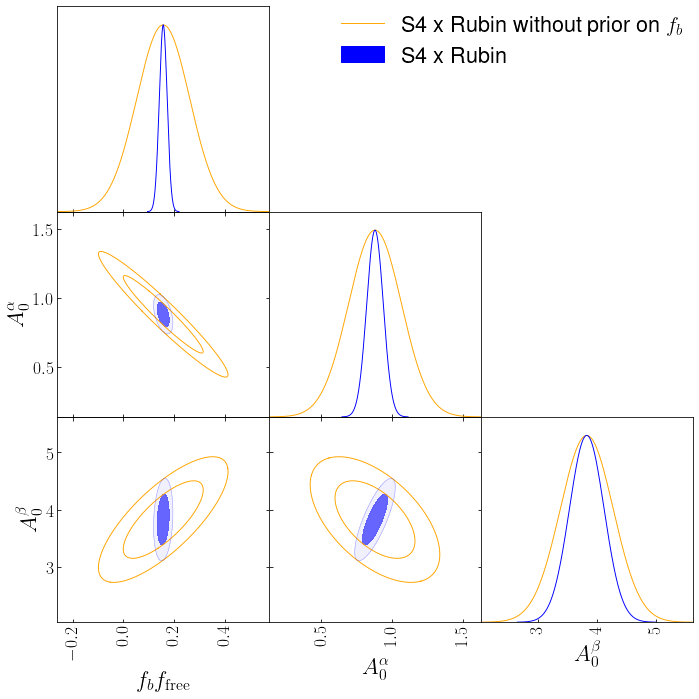

In [600]:
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta'
             ]


param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83  # A_beta
                        ]








# plot ellipses
plt.rcParams['text.usetex'] = True
# inverse_fisher_F_advact_lsst = np.load('test_fisher_advact_lsst_fb_without_prior.npy')
inverse_fisher_F_so_lsst_with_prior = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_s4_x_rubin_lensing_agn_ffree10pc_180422.npy')
inverse_fisher_F_so_lsst_without_prior = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_s4_x_rubin_lensing_agn_180422.npy')
# inverse_fisher_F_s4 = np.load('test_fisher_s4_unwise_blue_fb_prior.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_b f_\mathrm{free}', r'$A^{\alpha}_0$',r'$A^{\beta}_0$']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method

matrix1 = GaussianND(mean, 
                     inverse_fisher_F_so_lsst_without_prior, 
                     labels = labels, 
                     names = names)

matrix2 = GaussianND(mean, 
                     inverse_fisher_F_so_lsst_with_prior, 
                     labels = labels, 
                     names = names)

# matrix3 = GaussianND(mean, 
#                      inverse_fisher_F_s4_lsst, 
#                      labels = labels, 
#                      names = names)


# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.fig_width_inch = 10
# g.settings.constrained_layout = True
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 22
g.settings.axes_labelsize = 23
g.settings.axes_fontsize = 18
g.settings.axis_tick_x_rotation = 90
# g.settings.axis_tick_y_rotation = 45

# g.settings.alpha_filled_add = 0.9
# g.settings.title_limit_fontsize = 1

g.settings.solid_contour_palefactor = 0.9
g.settings.alpha_filled_add = 0.6

g.triangle_plot([matrix1,
                 matrix2], 
                names,
            filled = [False,True],
            legend_labels = [r'S4 x Rubin without prior on $f_b$' , 
                             'S4 x Rubin',
                             ], 
            contour_ls =  ['-','-'],
            legend_loc='upper right', 
            contour_colors = ['orange','blue'])

# Save triplot
g.export(path_to_kSZ2X_2022+'advact_s4_lsst_fb_prior_vs_no_prior.pdf')

## SO, S4 CMB lensing

In [ ]:
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta'
             ]


param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83  # A_beta
                        ]






# plot ellipses
plt.rcParams['text.usetex'] = True
# inverse_fisher_F_advact_lsst = np.load('test_fisher_advact_lsst_fb_without_prior.npy')
inverse_fisher_F_s4 = np.load(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_s4_cmb_lensing_agn_ffree10pc_180422.npy')
inverse_fisher_F_s4_no_prior = np.load(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_s4_cmb_lensing_agn_180422.npy')
inverse_fisher_F_so = np.load(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_so_cmb_lensing_agn_ffree10pc_180422.npy')
# inverse_fisher_F_s4 = np.load('test_fisher_s4_unwise_blue_fb_prior.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_b f_\mathrm{free}', r'$A^{\alpha}_0$',r'$A^{\beta}_0$']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method

matrix1 = GaussianND(mean, 
                     inverse_fisher_F_so, 
                     labels = labels, 
                     names = names)

matrix2 = GaussianND(mean, 
                     inverse_fisher_F_s4_no_prior, 
                     labels = labels, 
                     names = names)

matrix3 = GaussianND(mean, 
                     inverse_fisher_F_s4, 
                     labels = labels, 
                     names = names)


# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.fig_width_inch = 10
# g.settings.constrained_layout = True
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 22
g.settings.axes_labelsize = 23
g.settings.axes_fontsize = 18
g.settings.axis_tick_x_rotation = 90
# g.settings.axis_tick_y_rotation = 45

# g.settings.alpha_filled_add = 0.9
# g.settings.title_limit_fontsize = 1

g.settings.solid_contour_palefactor = 0.9
g.settings.alpha_filled_add = 0.6

g.triangle_plot([matrix1,
                 matrix2,
                 matrix3], 
                names,
            filled = [False,False,True],
            legend_labels = [r'SO with prior on $f_b$' , 
                             r'S4 without prior on $f_b$',
                             r'S4 with prior on $f_b$'
                             ], 
            contour_ls =  ['--','-','-'],
            legend_loc='upper right', 
            contour_colors = ['orange','green','blue'])

# Save triplot
g.export(path_to_kSZ2X_2022+'so_s4_lensing.pdf')